# IMPORTING LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling dates and times
import datetime as dt

# Feature scaling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# Handling missing data
from sklearn.impute import SimpleImputer

# Model development
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# StatsModels for advanced statistical analysis
import statsmodels.api as sm

# Model evaluation visualization
import matplotlib.dates as mdates

# For deployment (optional at this stage)
from flask import Flask, request, jsonify
import joblib  # For saving and loading models

# General utilities
import warnings
warnings.filterwarnings('ignore')

# Optional: OS operations
import os

#DATA EXPLORATION AND PREPROCESSING

In [2]:
import pandas as pd

# Define the file path
file_path = r"D:\Portfolio\HUBBLEMIND\Stock Market Dataset.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display all the records in the DataFrame
(df)

Unnamed: 0       Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           1242 2019-02-04              2.660          116490.0   
1           1241 2019-02-05              2.662           82250.0   
2           1240 2019-02-06              2.662           98330.0   
3           1239 2019-02-07              2.551          211790.0   
4           1238 2019-02-08              2.583          147880.0   
...          ...        ...                ...               ...   
1238           4 2024-01-29              2.490            3590.0   
1239           3 2024-01-30              2.077          139750.0   
1240           2 2024-01-31              2.100          142860.0   
1241           1 2024-02-01              2.050          161340.0   
1242           0 2024-02-02              2.079               NaN   

      Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  \
0               54.56        622470.0        2.7975        490.0   
1               53.66        609760.0        2.8205         90.0   
2               54.01        606720.0        2.8400        100.0   
3               52.64        749010.0        2.8320        320.0   
4               52.72        621000.0        2.8140        270.0   
...               ...             ...           ...          ...   
1238            76.78        331930.0        3.8790          NaN   
1239            77.82        347240.0        3.9110          NaN   
1240            75.85        344490.0        3.9060          NaN   
1241            73.82        577940.0        3.8535          NaN   
1242            72.28             NaN        3.8215          NaN   

      Bitcoin_Price  Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  \
0            3462.8      503920.0  ...         3,12,000           310.0   
1            3468.4      460950.0  ...         3,10,700           360.0   
2            3404.3      514210.0  ...         3,08,810           120.0   
3            3397.7      471360.0  ...         3,02,813           240.0   
4            3661.7      699230.0  ...         3,00,771           240.0   
...             ...           ...  ...              ...             ...   
1238        43299.8       45230.0  ...         5,78,800         13850.0   
1239        42946.2       55130.0  ...         5,84,680          9750.0   
1240        42580.5       56480.0  ...         5,78,020          9720.0   
1241        43081.4       47690.0  ...         5,81,600          9780.0   
1242        43194.7       42650.0  ...         5,89,498         10580.0   

      Netflix_Price  Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price  \
0            351.34     9050000.0         81.67   98580000.0      169.25   
1            355.81     9050000.0         82.94   89060000.0      171.16   
2            352.19     6720000.0         82.01   78800000.0      170.49   
3            344.71     7860000.0         80.72   92530000.0      166.38   
4            347.57     7560000.0         79.41  113150000.0      167.33   
...             ...           ...           ...          ...         ...   
1238         575.79     6880000.0        161.26   42840000.0      401.02   
1239         562.85     6120000.0        159.00   42290000.0      400.06   
1240         564.11     4830000.0        155.20   49690000.0      390.14   
1241         567.51     3150000.0        159.28   66360000.0      394.78   
1242         564.64     4030000.0        171.81  117220000.0      474.99   

       Meta_Vol.  Gold_Price  Gold_Vol.  
0     20040000.0      1319.3   159560.0  
1     22560000.0      1319.2   129010.0  
2     13280000.0      1314.4   137250.0  
3     17520000.0      1314.2   166760.0  
4     12560000.0      1318.5   150610.0  
...          ...         ...        ...  
1238  17790000.0      2034.9     1780.0  
1239  18610000.0      2050.9   214590.0  
1240  20010000.0      2067.4   238370.0  
1241  25140000.0      2071.1   260920.0  
1242  84710000.0      2053.7        NaN  

[1243 rows x 39 columns]

In [3]:
#display few records from the datafram

print(df.head())

   Unnamed: 0       Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0        1242 2019-02-04              2.660          116490.0   
1        1241 2019-02-05              2.662           82250.0   
2        1240 2019-02-06              2.662           98330.0   
3        1239 2019-02-07              2.551          211790.0   
4        1238 2019-02-08              2.583          147880.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0            54.56        622470.0        2.7975        490.0         3462.8   
1            53.66        609760.0        2.8205         90.0         3468.4   
2            54.01        606720.0        2.8400        100.0         3404.3   
3            52.64        749010.0        2.8320        320.0         3397.7   
4            52.72        621000.0        2.8140        270.0         3661.7   

   Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0      503920.0  ...         3,12,000           310.0   

In [4]:
#Check data types, missing values, and basic statistics

# Display data types of each column
print("Data Types:\n", df.dtypes)



Data Types:
 Unnamed: 0                    int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price               float64
Bitcoin_Vol.                float64
Platinum_Price              float64
Platinum_Vol.               float64
Ethereum_Price              float64
Ethereum_Vol.               float64
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                 float64
Nvidia_Price   

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display the number of missing values and their percentage
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("\nMissing Values and Percentage:\n", missing_data)




Missing Values and Percentage:
                    Missing Values  Percentage
Unnamed: 0                      0    0.000000
Date                            0    0.000000
Natural_Gas_Price               0    0.000000
Natural_Gas_Vol.                4    0.321802
Crude_oil_Price                 0    0.000000
Crude_oil_Vol.                 23    1.850362
Copper_Price                    0    0.000000
Copper_Vol.                    37    2.976669
Bitcoin_Price                   0    0.000000
Bitcoin_Vol.                    0    0.000000
Platinum_Price                  0    0.000000
Platinum_Vol.                 607   48.833467
Ethereum_Price                  0    0.000000
Ethereum_Vol.                   0    0.000000
S&P_500_Price                   0    0.000000
Nasdaq_100_Price                0    0.000000
Nasdaq_100_Vol.                 1    0.080451
Apple_Price                     0    0.000000
Apple_Vol.                      0    0.000000
Tesla_Price                     0    0.000000
T

In [6]:
# Display basic statistics
print("\nBasic Statistics:\n", df.describe(include='all'))


Basic Statistics:
          Unnamed: 0                           Date  Natural_Gas_Price  \
count   1243.000000                           1243        1243.000000   
unique          NaN                            NaN                NaN   
top             NaN                            NaN                NaN   
freq            NaN                            NaN                NaN   
mean     621.000000  2021-08-02 10:03:34.320193024           3.494714   
min        0.000000            2019-02-04 00:00:00           1.482000   
25%      310.500000            2020-04-28 12:00:00           2.347500   
50%      621.000000            2021-08-03 00:00:00           2.702000   
75%      931.500000            2022-11-05 12:00:00           4.055500   
max     1242.000000            2024-02-02 00:00:00           9.647000   
std      358.967501                            NaN           1.822540   

        Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  Copper_Price  \
count        1239.000000    

DATA CLEANING

In [7]:
# Step 1: Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Adjust format if needed

# Step 2: Sort the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date', ascending=True).reset_index(drop=True)

# Step 3: The sorted DataFrame is now stored in 'df_sorted'
df_sorted.head()  # Display the first few rows to verify the sort

Unnamed: 0       Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0        1242 2019-02-04              2.660          116490.0   
1        1241 2019-02-05              2.662           82250.0   
2        1240 2019-02-06              2.662           98330.0   
3        1239 2019-02-07              2.551          211790.0   
4        1238 2019-02-08              2.583          147880.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0            54.56        622470.0        2.7975        490.0         3462.8   
1            53.66        609760.0        2.8205         90.0         3468.4   
2            54.01        606720.0        2.8400        100.0         3404.3   
3            52.64        749010.0        2.8320        320.0         3397.7   
4            52.72        621000.0        2.8140        270.0         3661.7   

   Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0      503920.0  ...         3,12,000           310.0         351.34   
1      460950.0  ...         3,10,700           360.0         355.81   
2      514210.0  ...         3,08,810           120.0         352.19   
3      471360.0  ...         3,02,813           240.0         344.71   
4      699230.0  ...         3,00,771           240.0         347.57   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  \
0     9050000.0         81.67   98580000.0      169.25  20040000.0   
1     9050000.0         82.94   89060000.0      171.16  22560000.0   
2     6720000.0         82.01   78800000.0      170.49  13280000.0   
3     7860000.0         80.72   92530000.0      166.38  17520000.0   
4     7560000.0         79.41  113150000.0      167.33  12560000.0   

   Gold_Price  Gold_Vol.  
0      1319.3   159560.0  
1      1319.2   129010.0  
2      1314.4   137250.0  
3      1314.2   166760.0  
4      1318.5   150610.0  

[5 rows x 39 columns]

In [8]:
# Step 1: Identify columns with the 'object' dtype
object_columns = df_sorted.select_dtypes(include='object').columns
print(f"Columns with object data type: {object_columns}")

# Step 2: Convert object columns to float
for col in object_columns:
    df_sorted[col] = pd.to_numeric(df_sorted[col], errors='coerce')  # Convert to float, coercing errors to NaN

# Step 3: Verify conversion by checking data types
print(df_sorted.dtypes)

Columns with object data type: Index(['Berkshire_Price'], dtype='object')
Unnamed: 0                    int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price               float64
Bitcoin_Vol.                float64
Platinum_Price              float64
Platinum_Vol.               float64
Ethereum_Price              float64
Ethereum_Vol.               float64
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price              

# EXPLORATORY DATA ANALYSIS

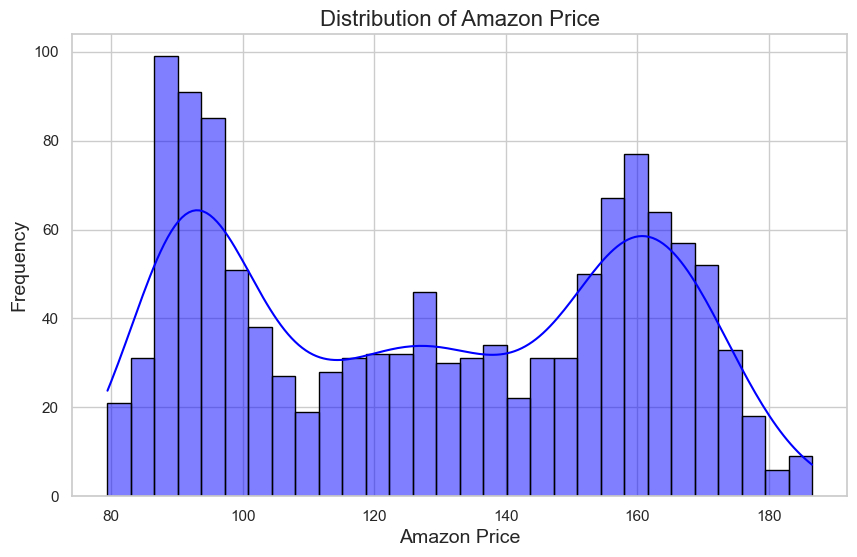

In [9]:

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of Amazon_Price
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df_sorted['Amazon_Price'], kde=True, bins=30, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Amazon Price', fontsize=16)
plt.xlabel('Amazon Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

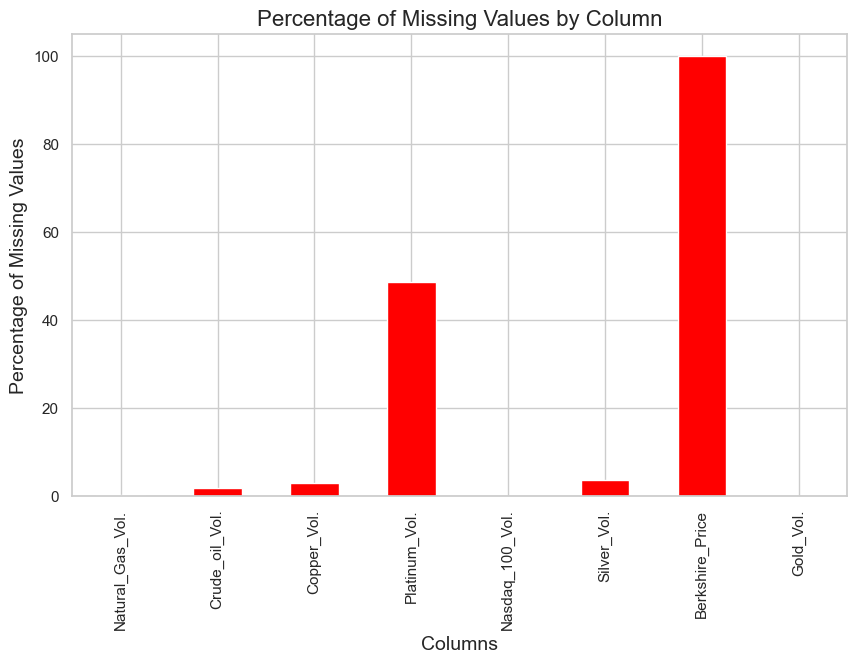

In [10]:
missing_values = df_sorted.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.show()

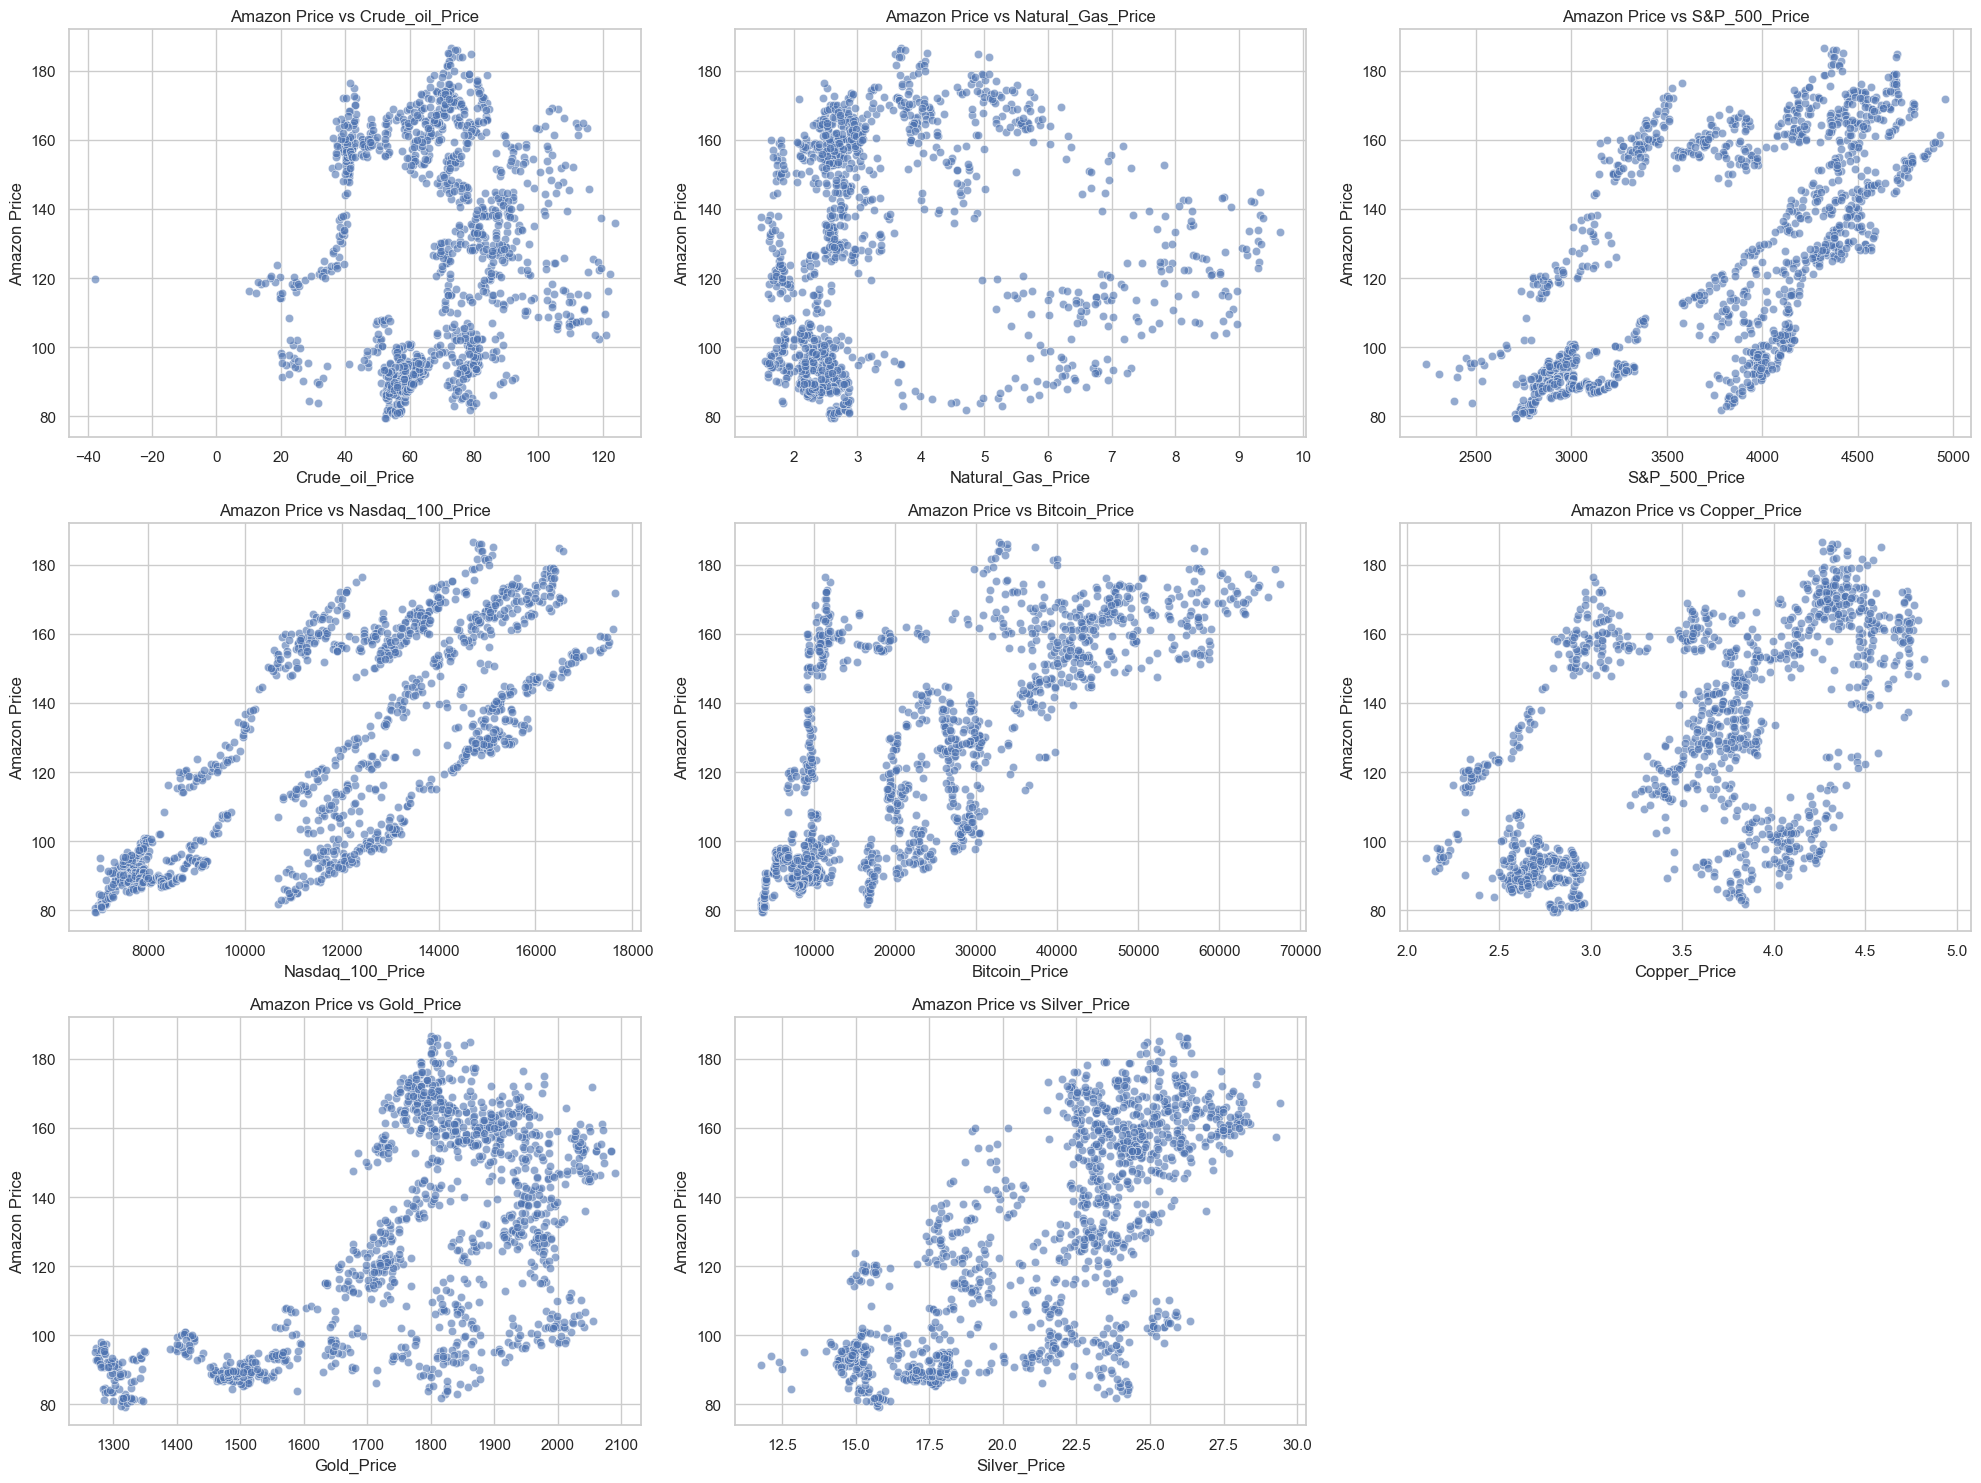

In [11]:

# Updated list of features to compare with Amazon_Price
features = ['Crude_oil_Price', 'Natural_Gas_Price', 'S&P_500_Price', 
            'Nasdaq_100_Price', 'Bitcoin_Price', 'Copper_Price', 
            'Gold_Price', 'Silver_Price']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate scatter plots
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_sorted[feature], y=df_sorted['Amazon_Price'], alpha=0.6)
    plt.title(f'Amazon Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Amazon Price')

plt.tight_layout()
plt.show()

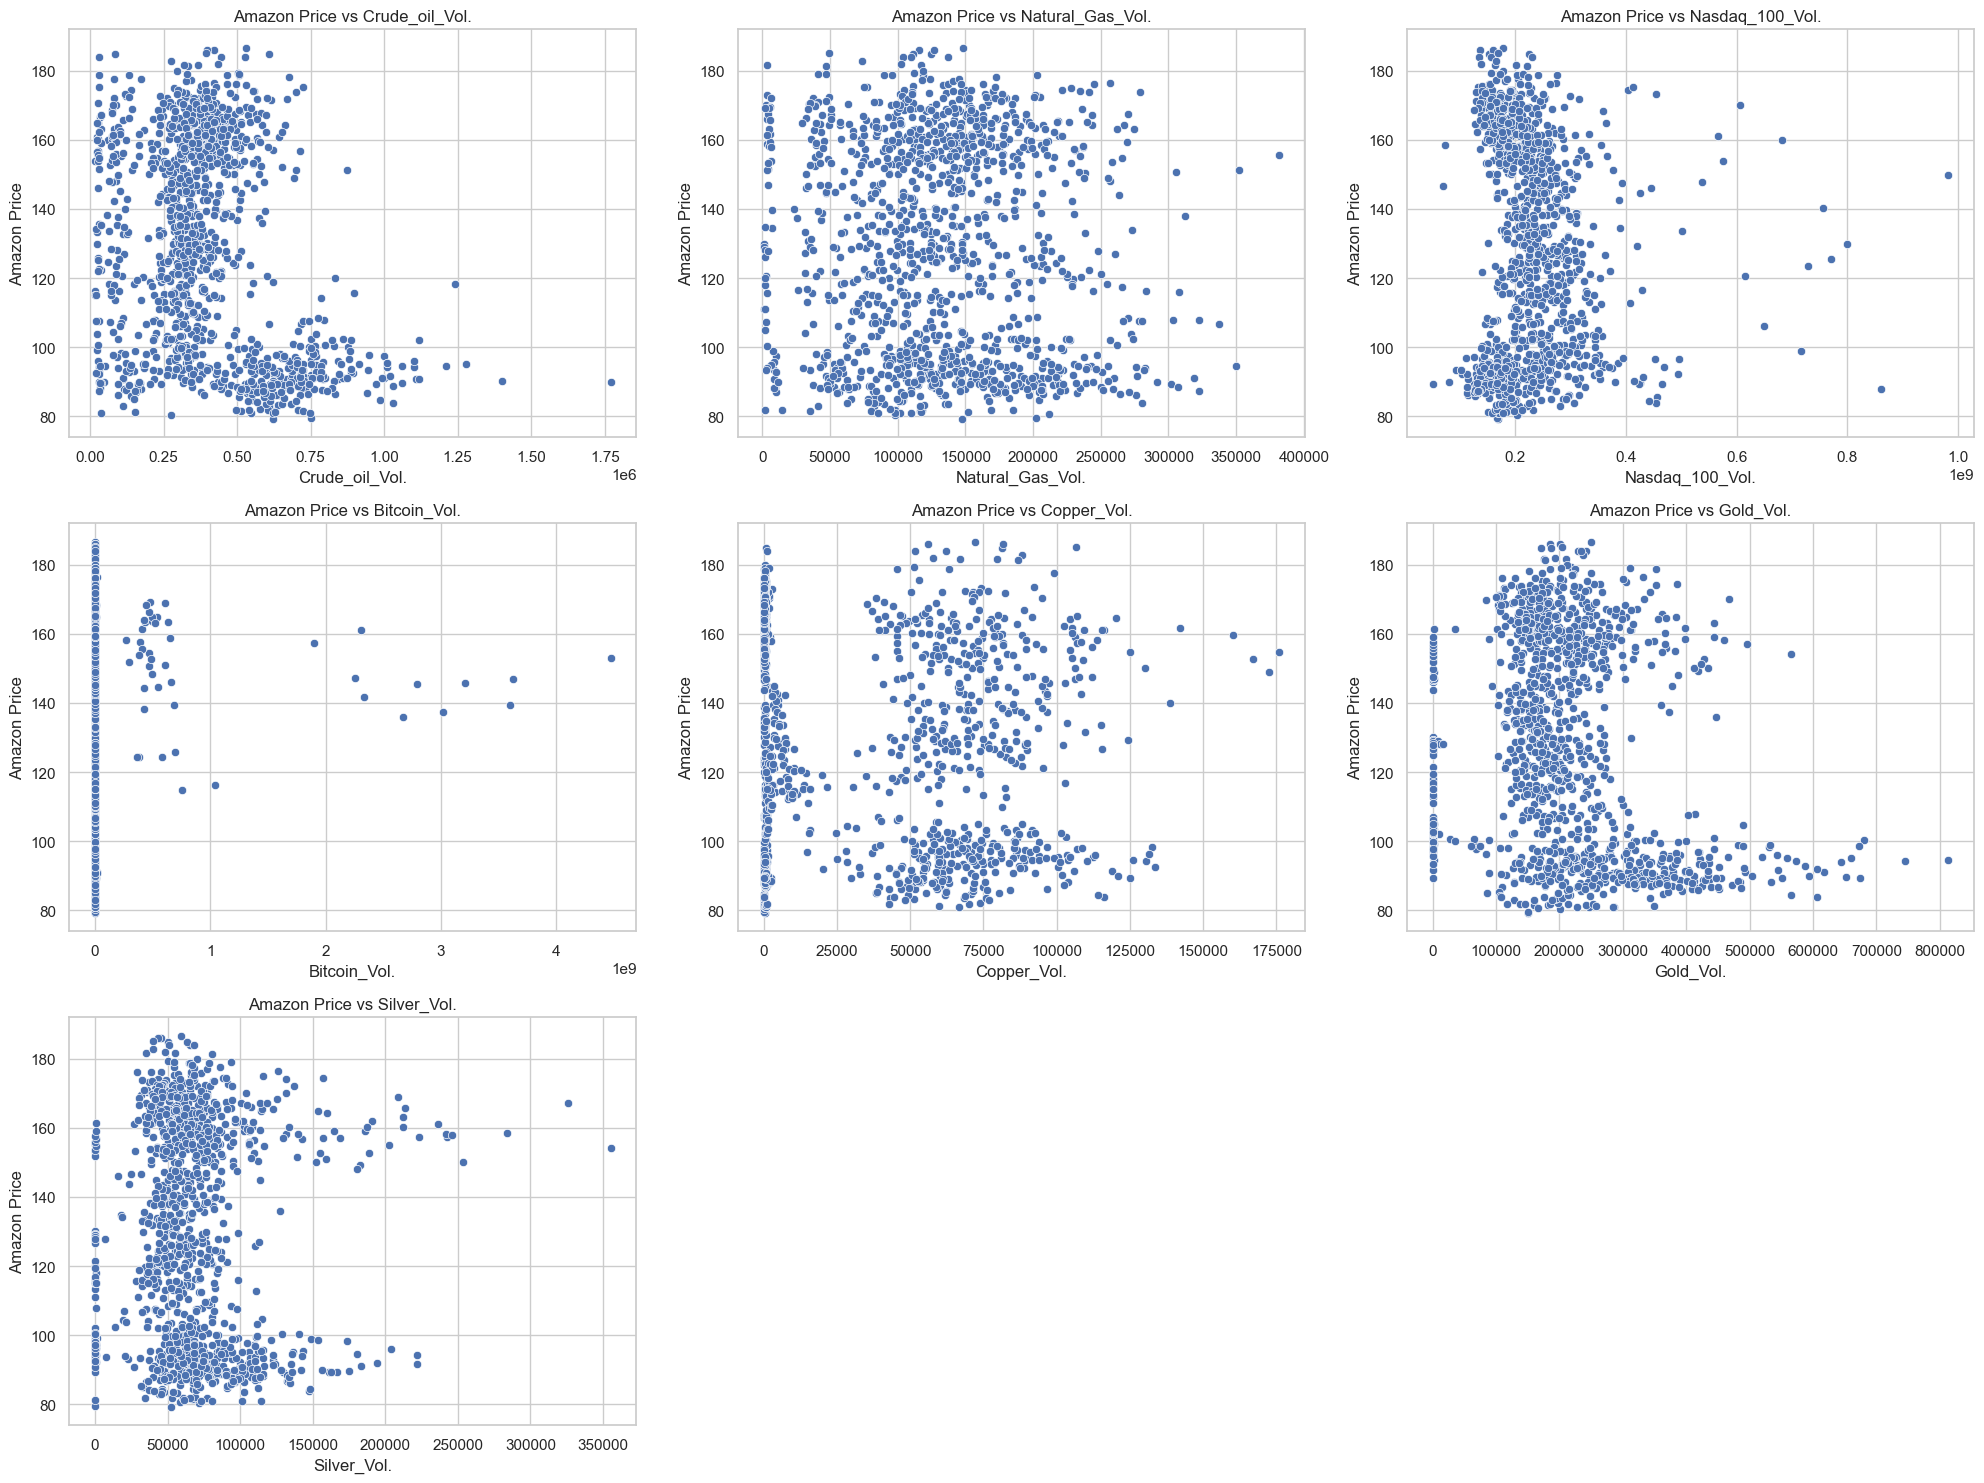

In [12]:

# Updated list of volume features to compare with Amazon_Price
volume_features = ['Crude_oil_Vol.', 'Natural_Gas_Vol.', 
                   'Nasdaq_100_Vol.', 'Bitcoin_Vol.', 'Copper_Vol.', 
                   'Gold_Vol.', 'Silver_Vol.']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate scatter plots
for i, feature in enumerate(volume_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_sorted[feature], y=df_sorted['Amazon_Price'], alpha=1)
    plt.title(f'Amazon Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Amazon Price')

plt.tight_layout()
plt.show()

                  Amazon_Price  Crude_oil_Vol.  Natural_Gas_Vol.  \
Amazon_Price          1.000000       -0.314654         -0.058512   
Crude_oil_Vol.       -0.314654        1.000000          0.155983   
Natural_Gas_Vol.     -0.058512        0.155983          1.000000   
Nasdaq_100_Vol.      -0.064014       -0.140313         -0.089422   
Bitcoin_Vol.          0.079938       -0.020243         -0.046180   
Copper_Vol.          -0.086681        0.035555         -0.022949   
Gold_Vol.            -0.226117        0.440076          0.189456   
Silver_Vol.           0.003200        0.218824          0.173293   

                  Nasdaq_100_Vol.  Bitcoin_Vol.  Copper_Vol.  Gold_Vol.  \
Amazon_Price            -0.064014      0.079938    -0.086681  -0.226117   
Crude_oil_Vol.          -0.140313     -0.020243     0.035555   0.440076   
Natural_Gas_Vol.        -0.089422     -0.046180    -0.022949   0.189456   
Nasdaq_100_Vol.          1.000000      0.084428     0.190532  -0.123167   
Bitcoin_Vol.

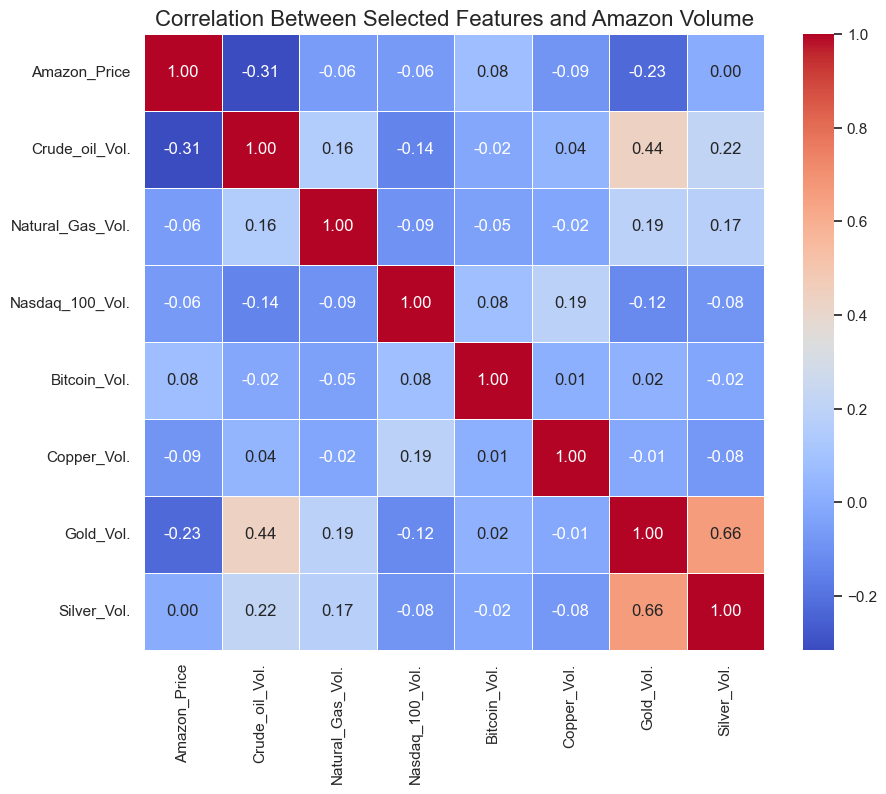

In [13]:
# List of selected features along with the target variable
selected_features = ['Amazon_Price', 'Crude_oil_Vol.', 'Natural_Gas_Vol.', 
                     'Nasdaq_100_Vol.', 'Bitcoin_Vol.', 'Copper_Vol.', 
                     'Gold_Vol.', 'Silver_Vol.']

# Compute the correlation matrix for the selected features
correlation_matrix = df_sorted[selected_features].corr()

# Display the correlation matrix (optional)
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the selected correlations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Between Selected Features and Amazon Volume', fontsize=16)
plt.show()

                   Amazon_Price  Crude_oil_Price  Natural_Gas_Price  \
Amazon_Price           1.000000         0.082066           0.129552   
Crude_oil_Price        0.082066         1.000000           0.716886   
Natural_Gas_Price      0.129552         0.716886           1.000000   
S&P_500_Price          0.630431         0.664019           0.394936   
Nasdaq_100_Price       0.754037         0.513566           0.287696   
Bitcoin_Price          0.716299         0.475090           0.288574   
Copper_Price           0.579606         0.708823           0.464759   
Gold_Price             0.592969         0.308522           0.135257   
Silver_Price           0.733125         0.304039           0.118991   

                   S&P_500_Price  Nasdaq_100_Price  Bitcoin_Price  \
Amazon_Price            0.630431          0.754037       0.716299   
Crude_oil_Price         0.664019          0.513566       0.475090   
Natural_Gas_Price       0.394936          0.287696       0.288574   
S&P_500_Price

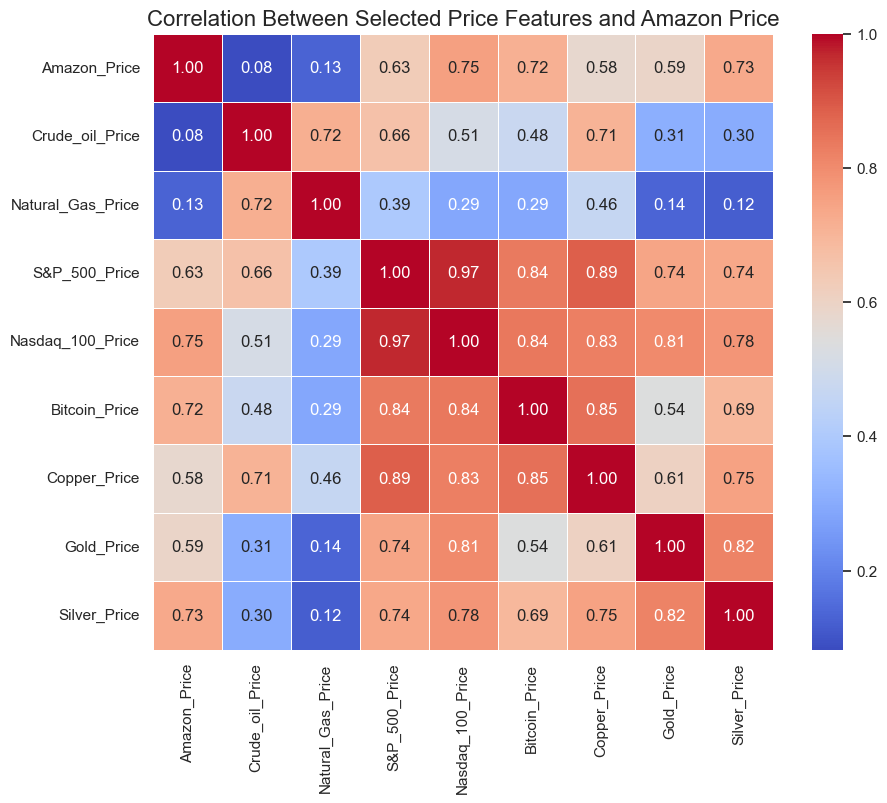

In [14]:
# List of selected price features along with the target variable
price_features = ['Amazon_Price', 'Crude_oil_Price', 'Natural_Gas_Price', 'S&P_500_Price', 
                  'Nasdaq_100_Price', 'Bitcoin_Price', 'Copper_Price', 
                  'Gold_Price', 'Silver_Price']

# Compute the correlation matrix for the selected price features
price_correlation_matrix = df_sorted[price_features].corr()

# Display the correlation matrix (optional)
print(price_correlation_matrix)


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the selected correlations
sns.heatmap(price_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Between Selected Price Features and Amazon Price', fontsize=16)
plt.show()

# FEATURE ENGINEERING 

In [15]:
# Step 1: Drop the "Unnamed" column
df_cleaned = df_sorted.drop(columns=[df_sorted.columns[0]])  # Adjust index if necessary

# Step 2: Impute missing values with the mean of their respective columns
df_cleaned = df_cleaned.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['float64', 'int64'] else x)

# Step 3: Add time-based features

# Adding 'MonthName' column
df_cleaned['MonthName'] = df_cleaned['Date'].dt.strftime('%b')

# Adding 'Year' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Adding 'Quarter' column
df_cleaned['Quarter'] = df_cleaned['Date'].dt.quarter

# Adding 'Week' column
df_cleaned['Week'] = df_cleaned['Date'].dt.isocalendar().week

# Adding 'MonthStartDate' column
df_cleaned['MonthStartDate'] = df_cleaned['Date'].apply(lambda x: x.replace(day=1))

# Adding 'WeekStartDate' column
df_cleaned['WeekStartDate'] = df_cleaned['Date'] - pd.to_timedelta(df_cleaned['Date'].dt.weekday, unit='d')

# Display the first few rows of the cleaned and enhanced dataframe
df_cleaned

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0    2019-02-04              2.660     116490.000000            54.56   
1    2019-02-05              2.662      82250.000000            53.66   
2    2019-02-06              2.662      98330.000000            54.01   
3    2019-02-07              2.551     211790.000000            52.64   
4    2019-02-08              2.583     147880.000000            52.72   
...         ...                ...               ...              ...   
1238 2024-01-29              2.490       3590.000000            76.78   
1239 2024-01-30              2.077     139750.000000            77.82   
1240 2024-01-31              2.100     142860.000000            75.85   
1241 2024-02-01              2.050     161340.000000            73.82   
1242 2024-02-02              2.079     131624.116223            72.28   

      Crude_oil_Vol.  Copper_Price   Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0      622470.000000        2.7975    490.000000         3462.8      503920.0   
1      609760.000000        2.8205     90.000000         3468.4      460950.0   
2      606720.000000        2.8400    100.000000         3404.3      514210.0   
3      749010.000000        2.8320    320.000000         3397.7      471360.0   
4      621000.000000        2.8140    270.000000         3661.7      699230.0   
...              ...           ...           ...            ...           ...   
1238   331930.000000        3.8790  35406.616915        43299.8       45230.0   
1239   347240.000000        3.9110  35406.616915        42946.2       55130.0   
1240   344490.000000        3.9060  35406.616915        42580.5       56480.0   
1241   577940.000000        3.8535  35406.616915        43081.4       47690.0   
1242   398903.778689        3.8215  35406.616915        43194.7       42650.0   

      Platinum_Price  ...  Meta_Price   Meta_Vol.  Gold_Price      Gold_Vol.  \
0             822.50  ...      169.25  20040000.0      1319.3  159560.000000   
1             821.35  ...      171.16  22560000.0      1319.2  129010.000000   
2             807.10  ...      170.49  13280000.0      1314.4  137250.000000   
3             800.80  ...      166.38  17520000.0      1314.2  166760.000000   
4             802.20  ...      167.33  12560000.0      1318.5  150610.000000   
...              ...  ...         ...         ...         ...            ...   
1238          938.30  ...      401.02  17790000.0      2034.9    1780.000000   
1239          931.70  ...      400.06  18610000.0      2050.9  214590.000000   
1240          932.60  ...      390.14  20010000.0      2067.4  238370.000000   
1241          922.30  ...      394.78  25140000.0      2071.1  260920.000000   
1242          901.60  ...      474.99  84710000.0      2053.7  211127.671233   

      MonthName  Year  Quarter  Week  MonthStartDate  WeekStartDate  
0           Feb  2019        1     6      2019-02-01     2019-02-04  
1           Feb  2019        1     6      2019-02-01     2019-02-04  
2           Feb  2019        1     6      2019-02-01     2019-02-04  
3           Feb  2019        1     6      2019-02-01     2019-02-04  
4           Feb  2019        1     6      2019-02-01     2019-02-04  
...         ...   ...      ...   ...             ...            ...  
1238        Jan  2024        1     5      2024-01-01     2024-01-29  
1239        Jan  2024        1     5      2024-01-01     2024-01-29  
1240        Jan  2024        1     5      2024-01-01     2024-01-29  
1241        Feb  2024        1     5      2024-02-01     2024-01-29  
1242        Feb  2024        1     5      2024-02-01     2024-01-29  

[1243 rows x 44 columns]

# MICELLEANOUS DATA CLEANING AND TRANSFORMATION

In [16]:
# Drop the "Unnamed" column and the specified columns
columns_to_drop = [
    'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.',
    'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
    'Microsoft_Price', 'Microsoft_Vol.', 'Google_Price', 'Google_Vol.',
    'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.',
    'Netflix_Price', 'Netflix_Vol.', 'Meta_Price', 'Meta_Vol.'
]

df_cleaned = df_sorted.drop(columns=[df_sorted.columns[0]] + columns_to_drop)

# Impute missing values with the mean of their respective columns
df_cleaned = df_cleaned.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['float64', 'int64'] else x)

# Round price columns to 3 decimal points and volume columns to 2 decimal points
price_columns = df_cleaned.filter(like='_Price').columns
volume_columns = df_cleaned.filter(like='_Vol').columns

df_cleaned[price_columns] = df_cleaned[price_columns].round(3)
df_cleaned[volume_columns] = df_cleaned[volume_columns].round(2)

# Adding 'MonthName' column
df_cleaned['MonthName'] = df_cleaned['Date'].dt.strftime('%b')

# Adding 'Year' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Adding 'Quarter' column
df_cleaned['Quarter'] = df_cleaned['Date'].dt.quarter

# Adding 'Week' column
df_cleaned['Week'] = df_cleaned['Date'].dt.isocalendar().week

# Adding 'MonthStartDate' column
df_cleaned['MonthStartDate'] = df_cleaned['Date'].apply(lambda x: x.replace(day=1))

# Adding 'WeekStartDate' column
df_cleaned['WeekStartDate'] = df_cleaned['Date'] - pd.to_timedelta(df_cleaned['Date'].dt.weekday, unit='d')

# Display the first few rows of the cleaned and enhanced dataframe
df_cleaned

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0    2019-02-04              2.660         116490.00            54.56   
1    2019-02-05              2.662          82250.00            53.66   
2    2019-02-06              2.662          98330.00            54.01   
3    2019-02-07              2.551         211790.00            52.64   
4    2019-02-08              2.583         147880.00            52.72   
...         ...                ...               ...              ...   
1238 2024-01-29              2.490           3590.00            76.78   
1239 2024-01-30              2.077         139750.00            77.82   
1240 2024-01-31              2.100         142860.00            75.85   
1241 2024-02-01              2.050         161340.00            73.82   
1242 2024-02-02              2.079         131624.12            72.28   

      Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0          622470.00         2.798       490.00         3462.8      503920.0   
1          609760.00         2.820        90.00         3468.4      460950.0   
2          606720.00         2.840       100.00         3404.3      514210.0   
3          749010.00         2.832       320.00         3397.7      471360.0   
4          621000.00         2.814       270.00         3661.7      699230.0   
...              ...           ...          ...            ...           ...   
1238       331930.00         3.879     35406.62        43299.8       45230.0   
1239       347240.00         3.911     35406.62        42946.2       55130.0   
1240       344490.00         3.906     35406.62        42580.5       56480.0   
1241       577940.00         3.854     35406.62        43081.4       47690.0   
1242       398903.78         3.822     35406.62        43194.7       42650.0   

      S&P_500_Price  ...  Amazon_Price  Amazon_Vol.  Gold_Price  Gold_Vol.  \
0           2724.87  ...         81.67   98580000.0      1319.3  159560.00   
1           2737.70  ...         82.94   89060000.0      1319.2  129010.00   
2           2731.61  ...         82.01   78800000.0      1314.4  137250.00   
3           2706.05  ...         80.72   92530000.0      1314.2  166760.00   
4           2707.88  ...         79.41  113150000.0      1318.5  150610.00   
...             ...  ...           ...          ...         ...        ...   
1238        4927.93  ...        161.26   42840000.0      2034.9    1780.00   
1239        4924.97  ...        159.00   42290000.0      2050.9  214590.00   
1240        4848.87  ...        155.20   49690000.0      2067.4  238370.00   
1241        4906.19  ...        159.28   66360000.0      2071.1  260920.00   
1242        4958.61  ...        171.81  117220000.0      2053.7  211127.67   

      MonthName  Year  Quarter  Week MonthStartDate  WeekStartDate  
0           Feb  2019        1     6     2019-02-01     2019-02-04  
1           Feb  2019        1     6     2019-02-01     2019-02-04  
2           Feb  2019        1     6     2019-02-01     2019-02-04  
3           Feb  2019        1     6     2019-02-01     2019-02-04  
4           Feb  2019        1     6     2019-02-01     2019-02-04  
...         ...   ...      ...   ...            ...            ...  
1238        Jan  2024        1     5     2024-01-01     2024-01-29  
1239        Jan  2024        1     5     2024-01-01     2024-01-29  
1240        Jan  2024        1     5     2024-01-01     2024-01-29  
1241        Feb  2024        1     5     2024-02-01     2024-01-29  
1242        Feb  2024        1     5     2024-02-01     2024-01-29  

[1243 rows x 24 columns]

# INTRODUCING LAG FEATURES TO EVALUATE DAY'S PREVIOUS CLOSE , HIGH AND LOW PRICE

In [17]:
# Step 1: Copy the original cleaned dataframe to a new dataframe
df_features = df_cleaned.copy()

# Step 2: List of price features to create lag features and indicators for
price_features = [
    'Crude_oil_Price', 'Natural_Gas_Price', 'S&P_500_Price', 
    'Nasdaq_100_Price', 'Bitcoin_Price', 'Copper_Price', 
    'Gold_Price', 'Silver_Price', 'Amazon_Price'
]

# Step 3: Sort the dataframe by date to ensure features are based on the correct dates
df_features = df_features.sort_values(by='Date').reset_index(drop=True)

# Step 4: Create Lag Features (1-Day Lag)
for feature in price_features:
    df_features[f'{feature}_Lag_1'] = df_features[feature].shift(1)

# Step 5: Fill NaN values in the lag features with the corresponding current value
for feature in price_features:
    df_features[f'{feature}_Lag_1'] = df_features[f'{feature}_Lag_1'].fillna(df_features[feature])

# Step 6: Create Previous Close, High, and Low based on 1-Day Lag
for feature in price_features:
    df_features[f'{feature}_Previous_Close'] = df_features[f'{feature}_Lag_1']
    df_features[f'{feature}_Previous_High'] = df_features[[feature, f'{feature}_Lag_1']].max(axis=1)
    df_features[f'{feature}_Previous_Low'] = df_features[[feature, f'{feature}_Lag_1']].min(axis=1)

# Step 7: Ensure there are no NaN values in the new columns (though it should be already handled)
df_features = df_features.fillna(method='ffill')  # Forward fill any remaining NaNs
df_features = df_features.fillna(method='bfill')  # Backward fill if necessary (as a precaution)

# Step 8: Retain all the original columns along with the newly created lag and previous high/low/close columns
columns_to_keep = [col for col in df_features.columns if 'Lag_1' in col or 'Previous' in col]
columns_to_keep += df_cleaned.columns.tolist()  # Add original columns, avoiding duplicates

# Step 9: Create a new dataframe with the retained columns
df_features = df_features[columns_to_keep].copy()

# Step 10: Display the first few rows of the new dataframe
df_features

Crude_oil_Price_Lag_1  Natural_Gas_Price_Lag_1  S&P_500_Price_Lag_1  \
0                     54.56                    2.660              2724.87   
1                     54.56                    2.660              2724.87   
2                     53.66                    2.662              2737.70   
3                     54.01                    2.662              2731.61   
4                     52.64                    2.551              2706.05   
...                     ...                      ...                  ...   
1238                  78.01                    2.712              4890.97   
1239                  76.78                    2.490              4927.93   
1240                  77.82                    2.077              4924.97   
1241                  75.85                    2.100              4848.87   
1242                  73.82                    2.050              4906.19   

      Nasdaq_100_Price_Lag_1  Bitcoin_Price_Lag_1  Copper_Price_Lag_1  \
0                    6959.96               3462.8               2.798   
1                    6959.96               3462.8               2.798   
2                    7023.52               3468.4               2.820   
3                    6997.62               3404.3               2.840   
4                    6904.98               3397.7               2.832   
...                      ...                  ...                 ...   
1238                17421.01              41811.3               3.852   
1239                17596.27              43299.8               3.879   
1240                17476.71              42946.2               3.911   
1241                17137.24              42580.5               3.906   
1242                17344.71              43081.4               3.854   

      Gold_Price_Lag_1  Silver_Price_Lag_1  Amazon_Price_Lag_1  \
0               1319.3              15.886               81.67   
1               1319.3              15.886               81.67   
2               1319.2              15.836               82.94   
3               1314.4              15.701               82.01   
4               1314.2              15.713               80.72   
...                ...                 ...                 ...   
1238            2026.6              22.758              159.12   
1239            2034.9              23.134              161.26   
1240            2050.9              23.225              159.00   
1241            2067.4              23.169              155.20   
1242            2071.1              23.236              159.28   

      Crude_oil_Price_Previous_Close  ...  Amazon_Price  Amazon_Vol.  \
0                              54.56  ...         81.67   98580000.0   
1                              54.56  ...         82.94   89060000.0   
2                              53.66  ...         82.01   78800000.0   
3                              54.01  ...         80.72   92530000.0   
4                              52.64  ...         79.41  113150000.0   
...                              ...  ...           ...          ...   
1238                           78.01  ...        161.26   42840000.0   
1239                           76.78  ...        159.00   42290000.0   
1240                           77.82  ...        155.20   49690000.0   
1241                           75.85  ...        159.28   66360000.0   
1242                           73.82  ...        171.81  117220000.0   

      Gold_Price  Gold_Vol.  MonthName  Year  Quarter  Week  MonthStartDate  \
0         1319.3  159560.00        Feb  2019        1     6      2019-02-01   
1         1319.2  129010.00        Feb  2019        1     6      2019-02-01   
2         1314.4  137250.00        Feb  2019        1     6      2019-02-01   
3         1314.2  166760.00        Feb  2019        1     6      2019-02-01   
4         1318.5  150610.00        Feb  2019        1     6      2019-02-01   
...          ...        ...        ...   ...      ...   ...             

# EDA ON FEATURED DATAFRAME

In [18]:
# 1. Understand the Structure of the DataFrame
print("1. Structure of the DataFrame:")
print(f"Shape: {df_features.shape}\n")
print(f"Columns: {df_features.columns}\n")
print("Info:")
print(df_features.info())
print("\n")

# 2. Descriptive Statistics
print("2. Descriptive Statistics:")
print(df_features.describe(include='all'))
print("\n")

# 3. Missing Values
print("3. Missing Values:")
missing_values = df_features.isnull().sum()
missing_percentage = (missing_values / len(df_features)) * 100
print("Count of Missing Values:")
print(missing_values)
print("\nPercentage of Missing Values:")
print(missing_percentage)
print("\n")



1. Structure of the DataFrame:
Shape: (1243, 60)

Columns: Index(['Crude_oil_Price_Lag_1', 'Natural_Gas_Price_Lag_1',
       'S&P_500_Price_Lag_1', 'Nasdaq_100_Price_Lag_1', 'Bitcoin_Price_Lag_1',
       'Copper_Price_Lag_1', 'Gold_Price_Lag_1', 'Silver_Price_Lag_1',
       'Amazon_Price_Lag_1', 'Crude_oil_Price_Previous_Close',
       'Crude_oil_Price_Previous_High', 'Crude_oil_Price_Previous_Low',
       'Natural_Gas_Price_Previous_Close', 'Natural_Gas_Price_Previous_High',
       'Natural_Gas_Price_Previous_Low', 'S&P_500_Price_Previous_Close',
       'S&P_500_Price_Previous_High', 'S&P_500_Price_Previous_Low',
       'Nasdaq_100_Price_Previous_Close', 'Nasdaq_100_Price_Previous_High',
       'Nasdaq_100_Price_Previous_Low', 'Bitcoin_Price_Previous_Close',
       'Bitcoin_Price_Previous_High', 'Bitcoin_Price_Previous_Low',
       'Copper_Price_Previous_Close', 'Copper_Price_Previous_High',
       'Copper_Price_Previous_Low', 'Gold_Price_Previous_Close',
       'Gold_Price_Previous_H

4. Distribution of Numerical Features:


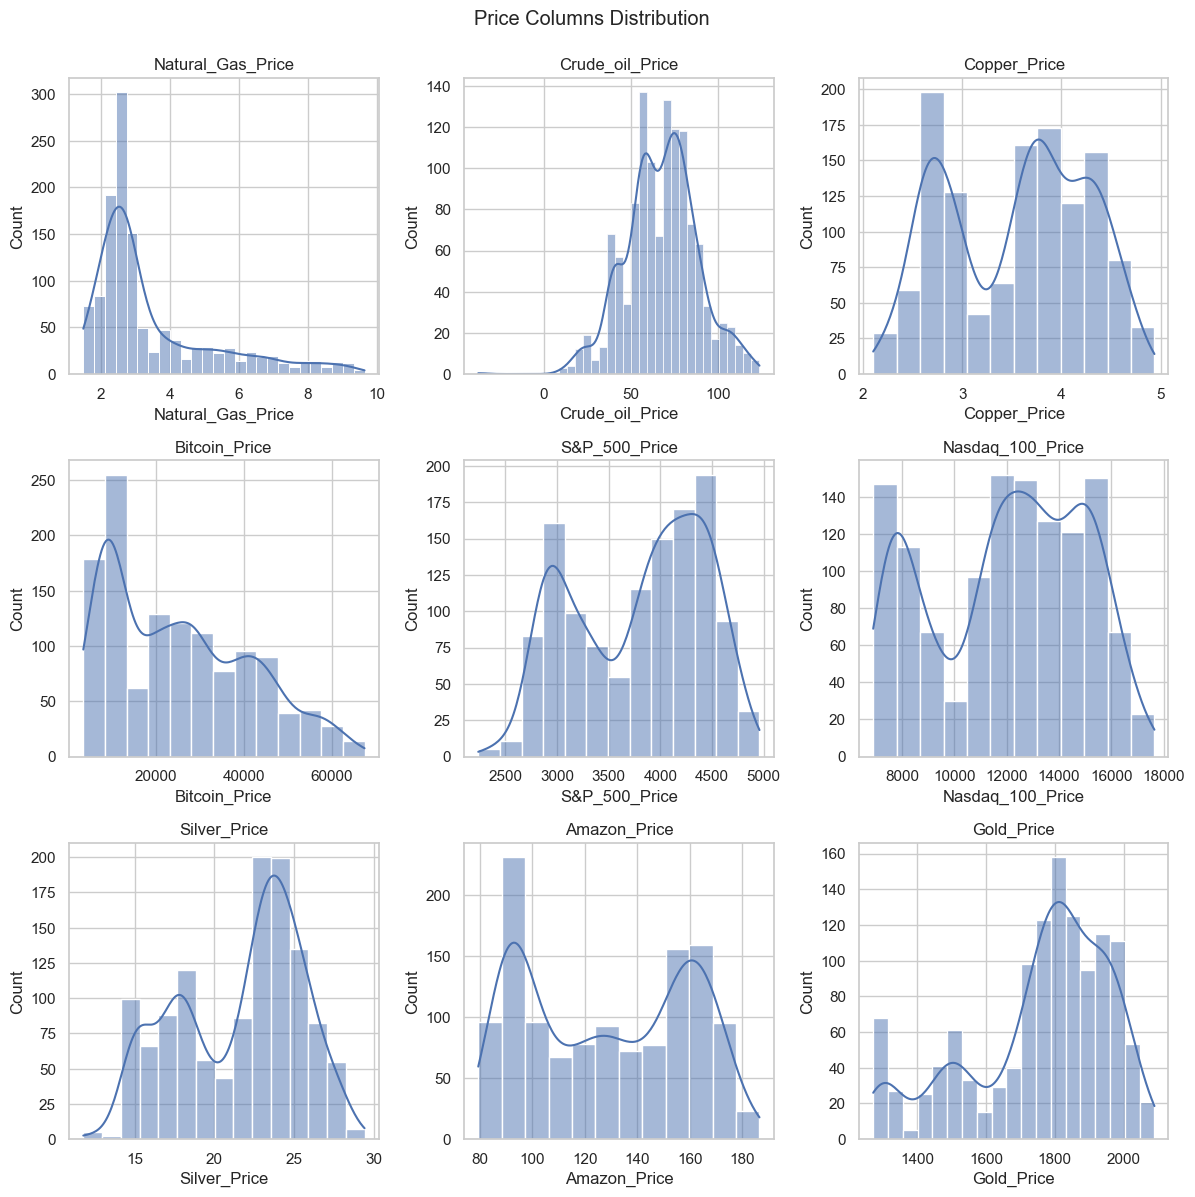

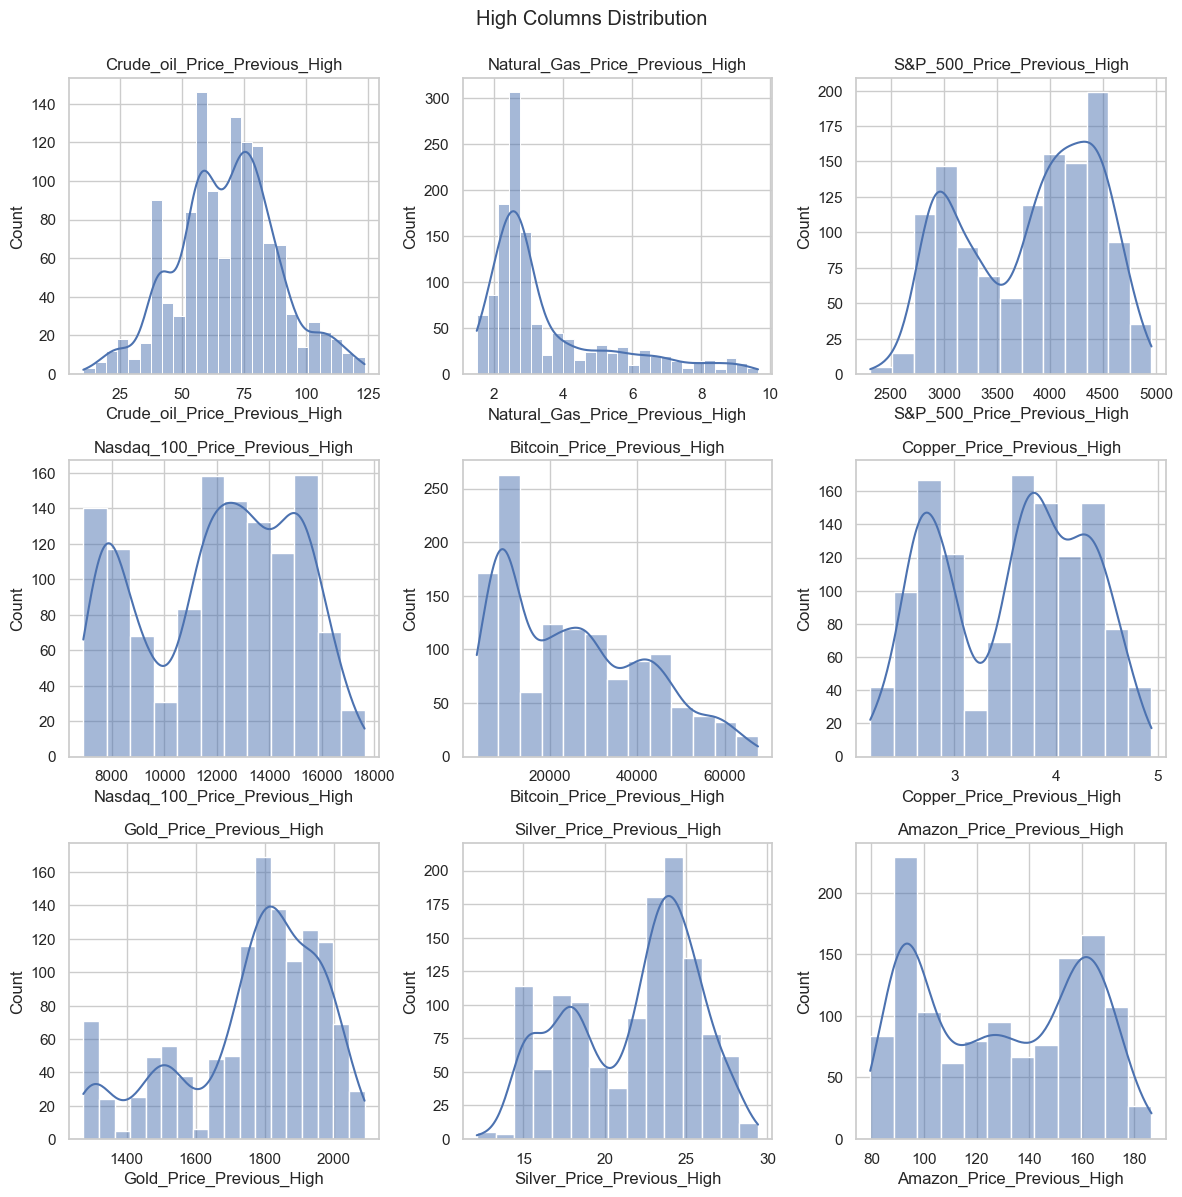

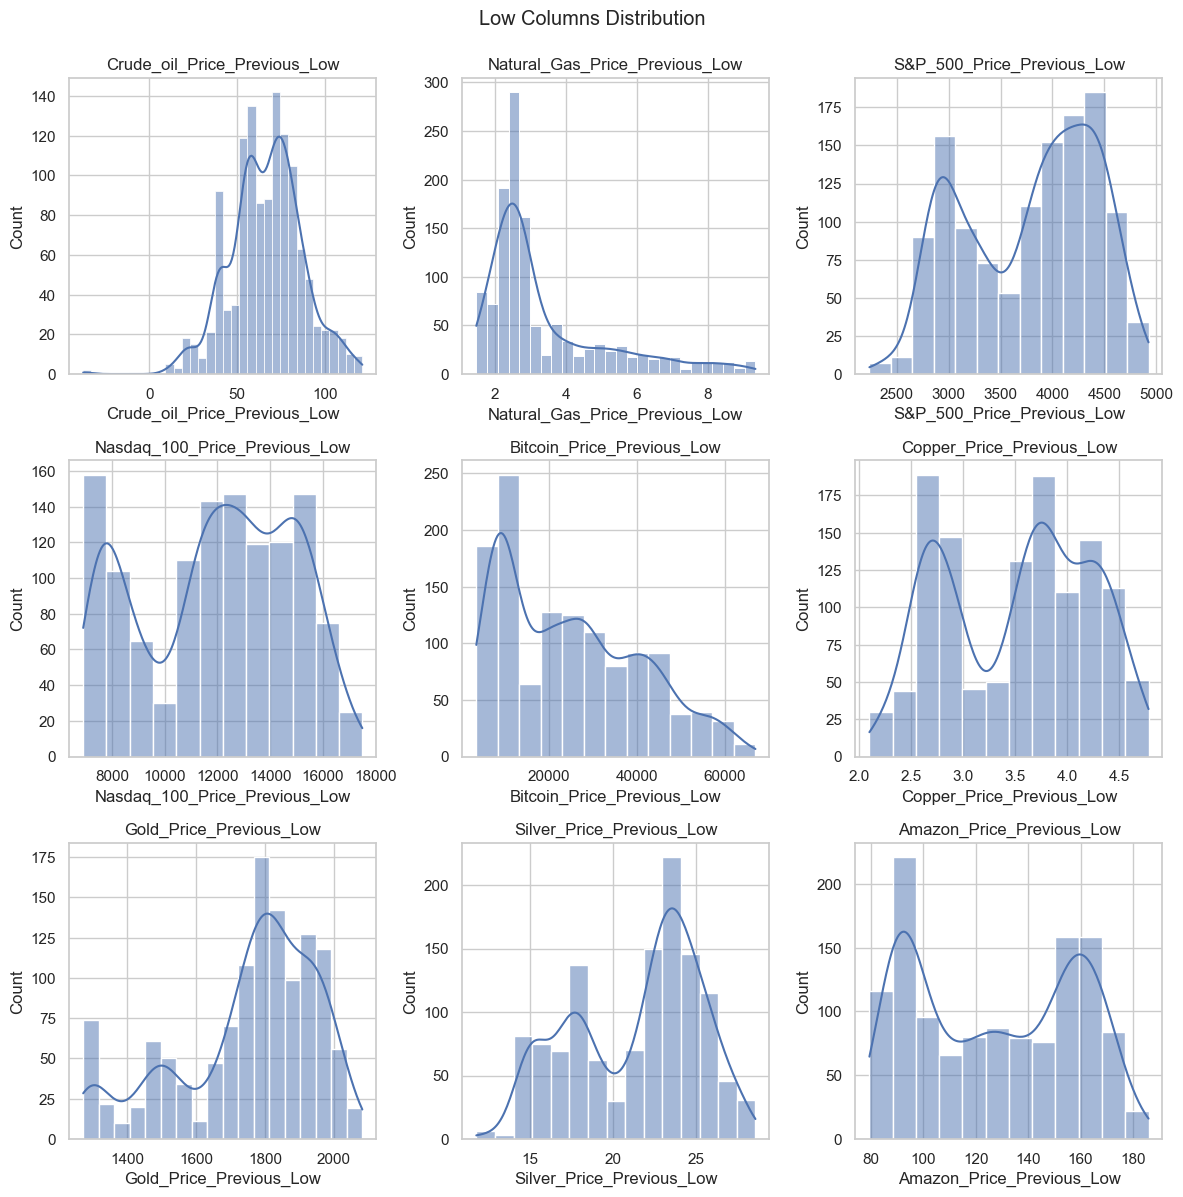

In [19]:
# Define relevant columns
price_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 
                  'S&P_500_Price', 'Nasdaq_100_Price', 'Silver_Price', 'Amazon_Price', 'Gold_Price']
high_columns = ['Crude_oil_Price_Previous_High', 'Natural_Gas_Price_Previous_High', 
                'S&P_500_Price_Previous_High', 'Nasdaq_100_Price_Previous_High', 
                'Bitcoin_Price_Previous_High', 'Copper_Price_Previous_High', 
                'Gold_Price_Previous_High', 'Silver_Price_Previous_High', 
                'Amazon_Price_Previous_High']
low_columns = ['Crude_oil_Price_Previous_Low', 'Natural_Gas_Price_Previous_Low', 
               'S&P_500_Price_Previous_Low', 'Nasdaq_100_Price_Previous_Low', 
               'Bitcoin_Price_Previous_Low', 'Copper_Price_Previous_Low', 
               'Gold_Price_Previous_Low', 'Silver_Price_Previous_Low', 
               'Amazon_Price_Previous_Low']

# 4. Distribution of Numerical Features
def plot_histograms(columns, title):
    plt.figure(figsize=(12, len(columns) // 3 * 5))
    for i, col in enumerate(columns):
        plt.subplot(len(columns) // 3 + 1, 3, i + 1)
        sns.histplot(df_features[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

print("4. Distribution of Numerical Features:")
plot_histograms(price_columns, "Price Columns Distribution")
plot_histograms(high_columns, "High Columns Distribution")
plot_histograms(low_columns, "Low Columns Distribution")

5. Outliers Detection (Scatter Plots):


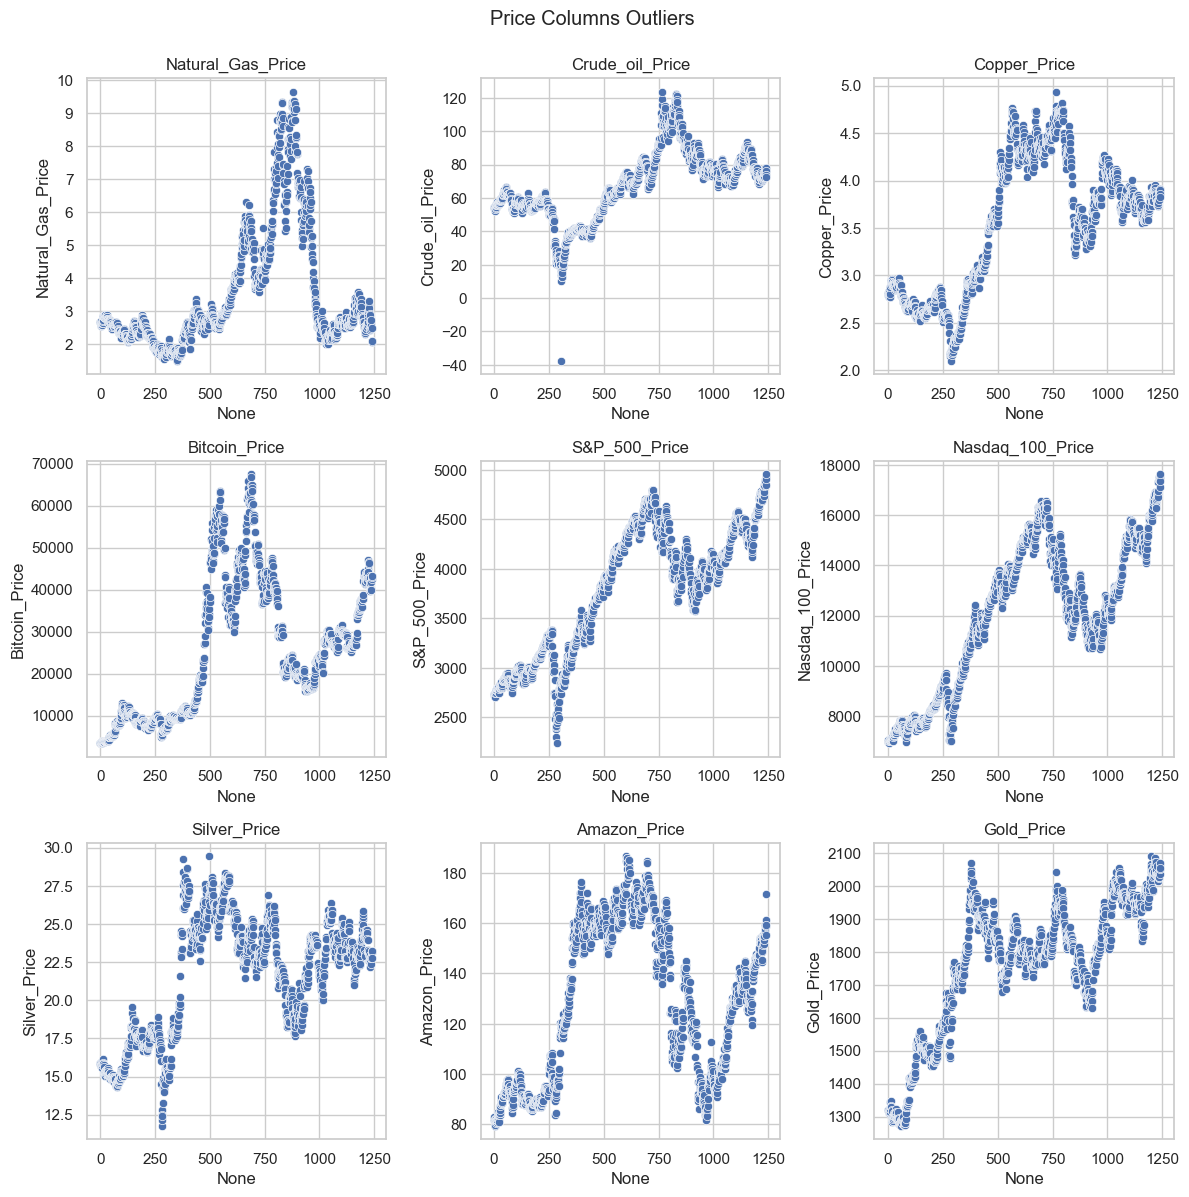

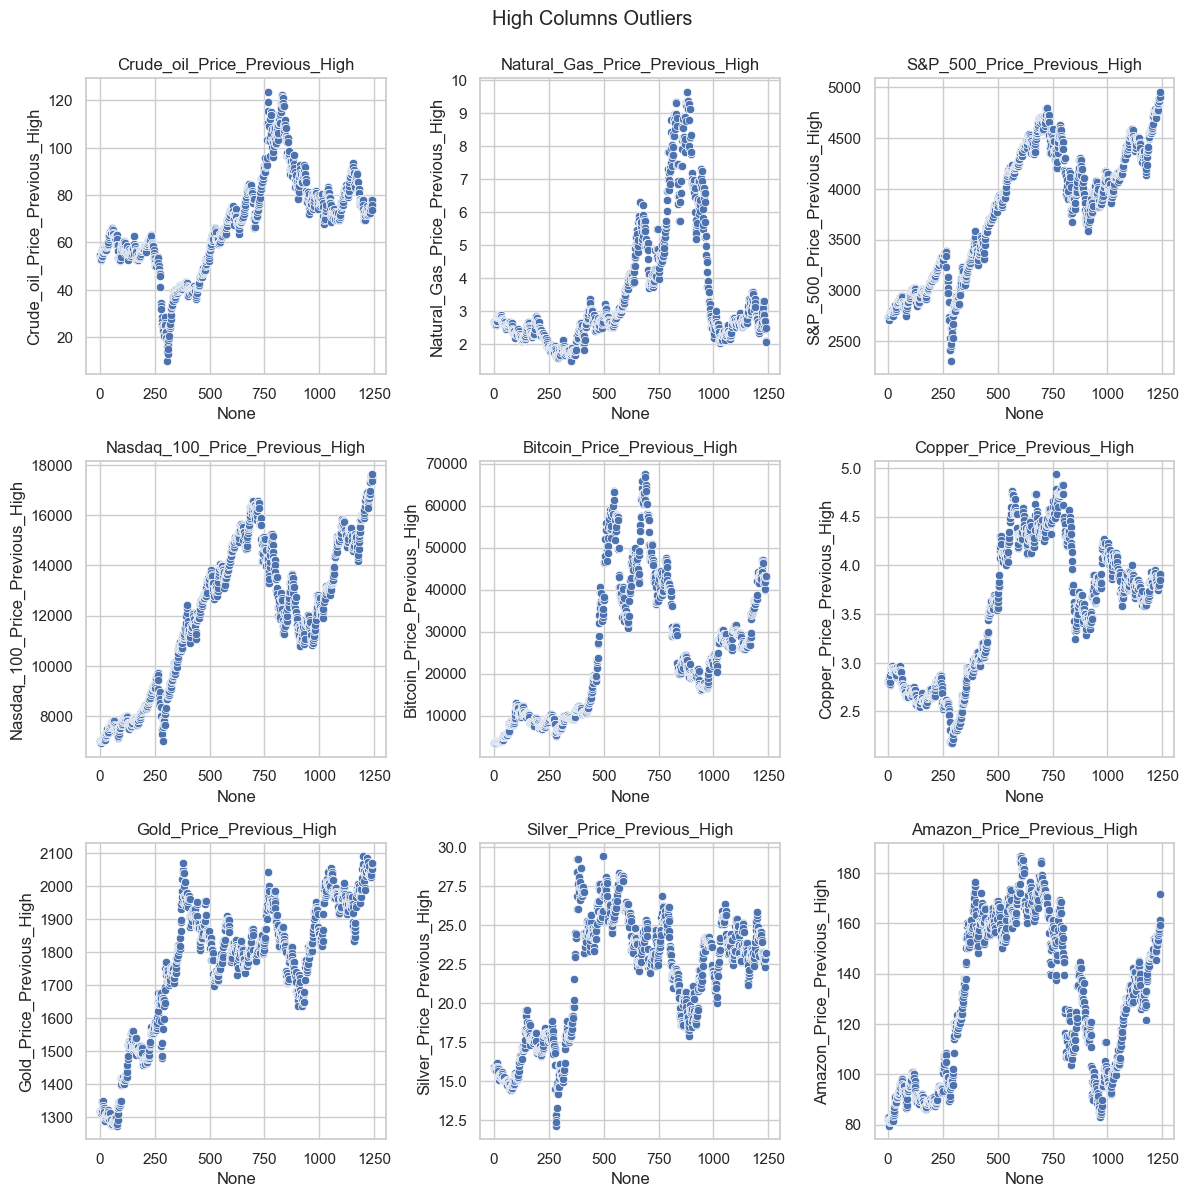

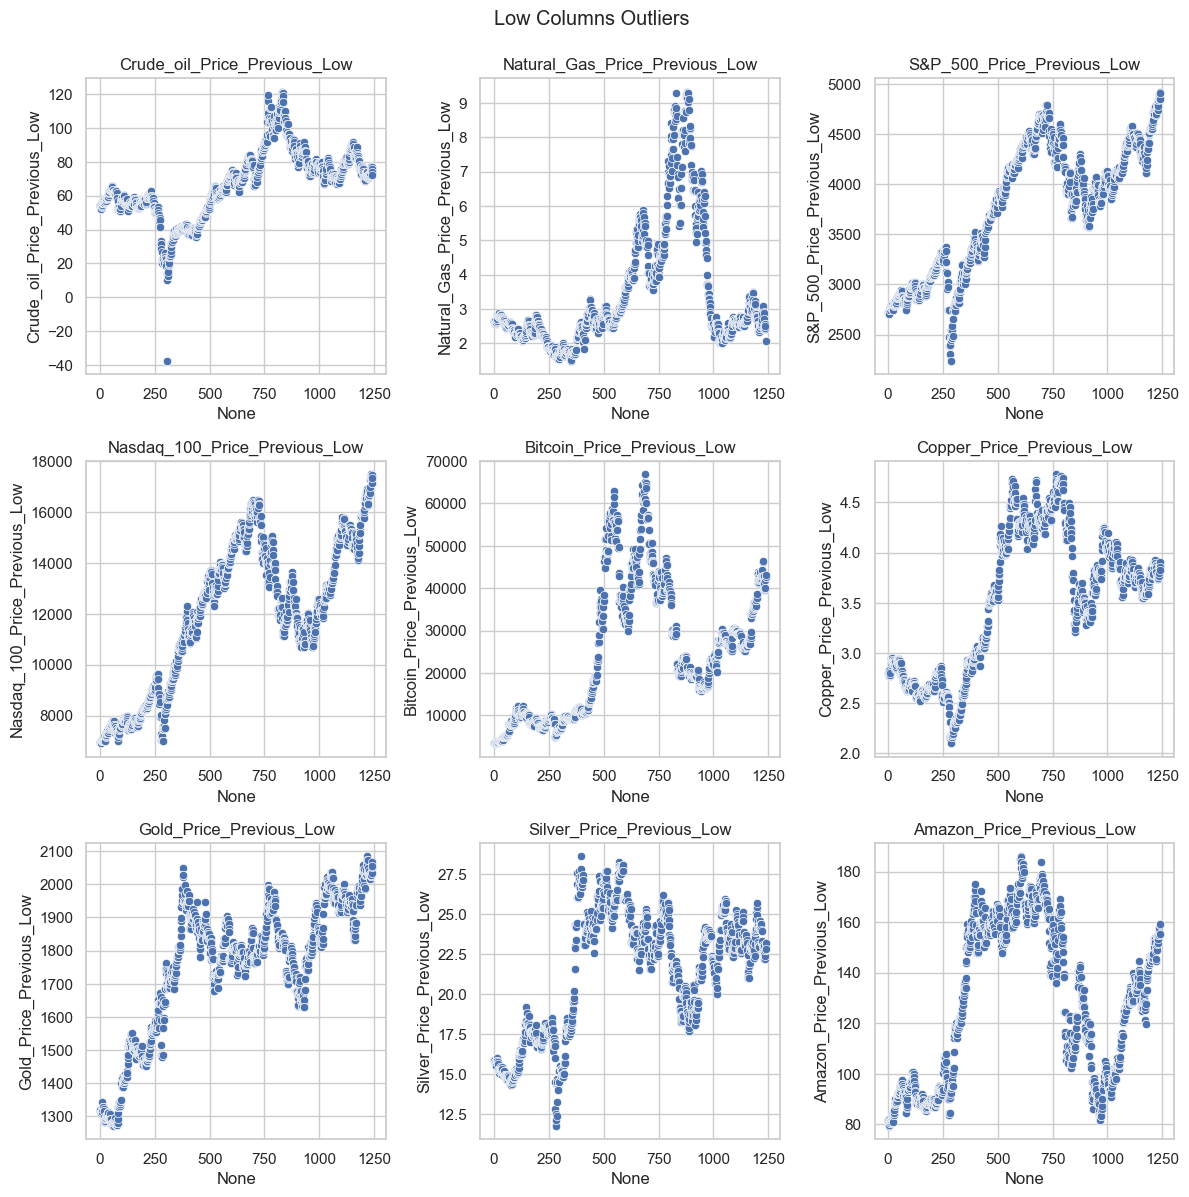

In [20]:
# 5. Outliers Detection
def plot_scatter(columns, title):
    plt.figure(figsize=(12, len(columns) // 3 * 5))
    for i, col in enumerate(columns):
        plt.subplot(len(columns) // 3 + 1, 3, i + 1)
        sns.scatterplot(x=df_features.index, y=df_features[col])
        plt.title(col)
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

print("5. Outliers Detection (Scatter Plots):")
plot_scatter(price_columns, "Price Columns Outliers")
plot_scatter(high_columns, "High Columns Outliers")
plot_scatter(low_columns, "Low Columns Outliers")

6. Correlation Analysis:


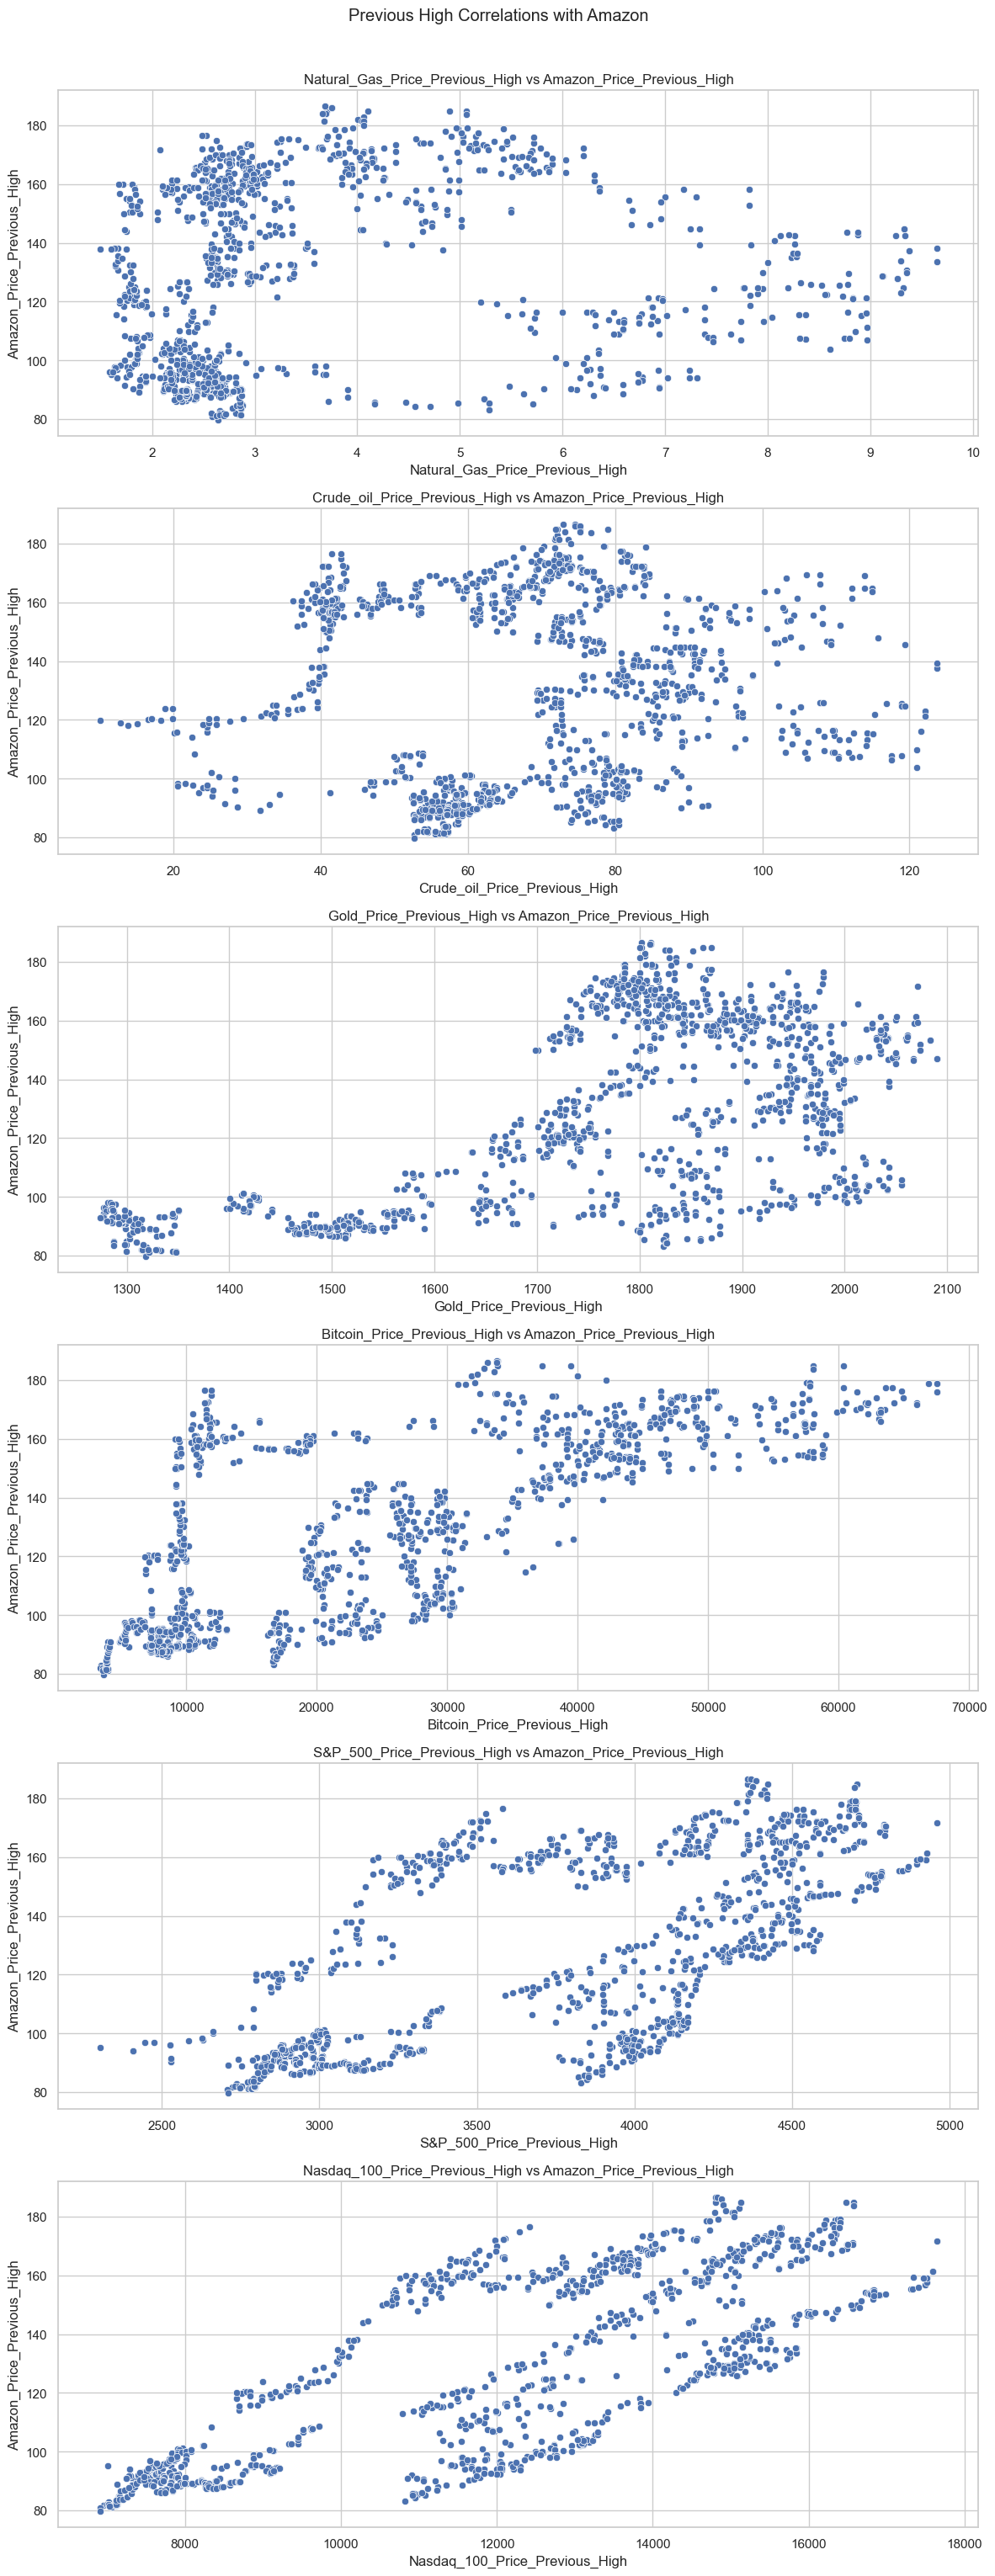

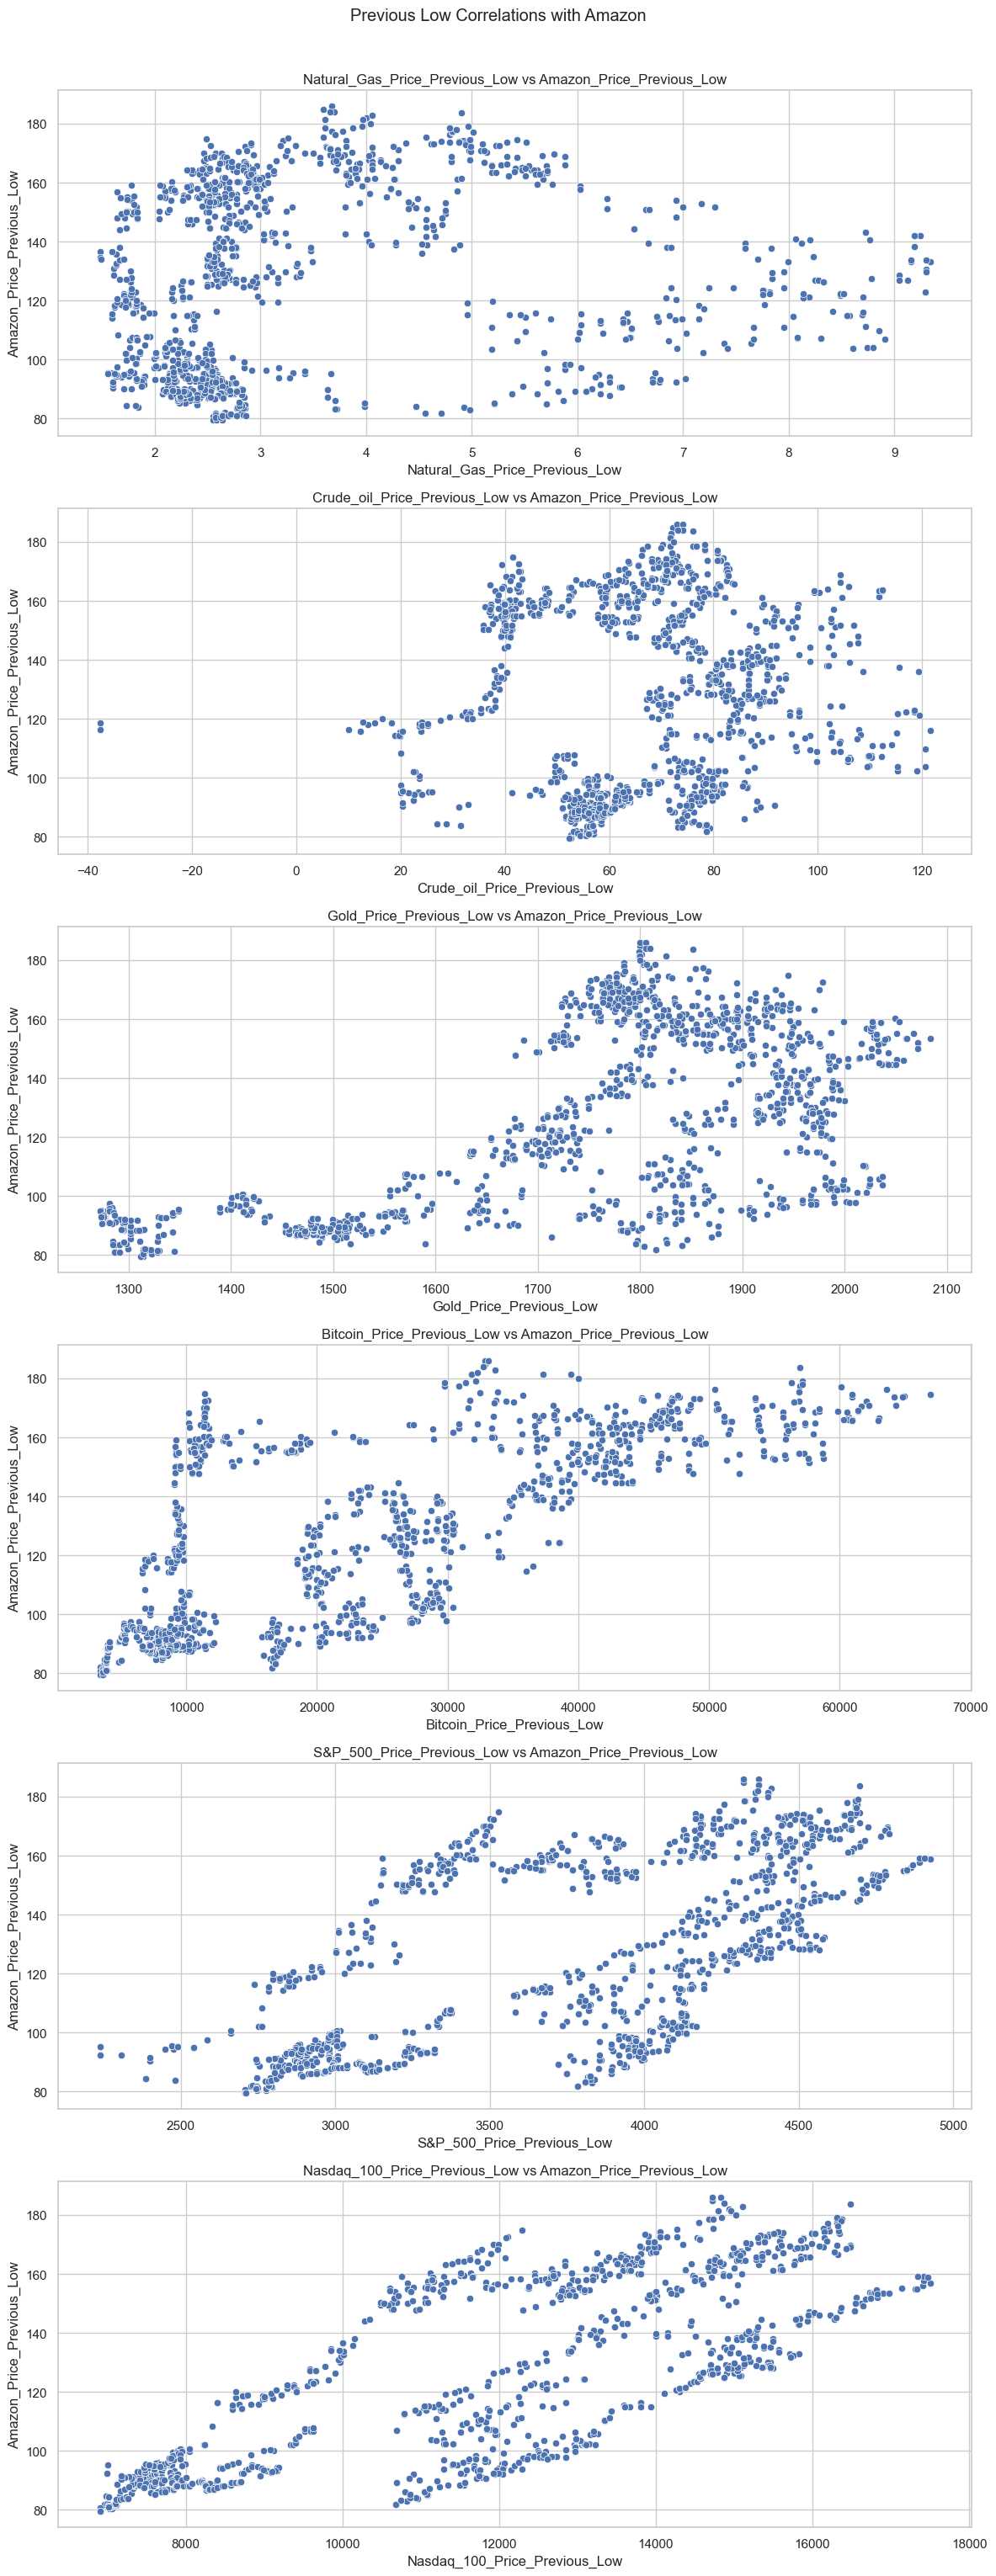

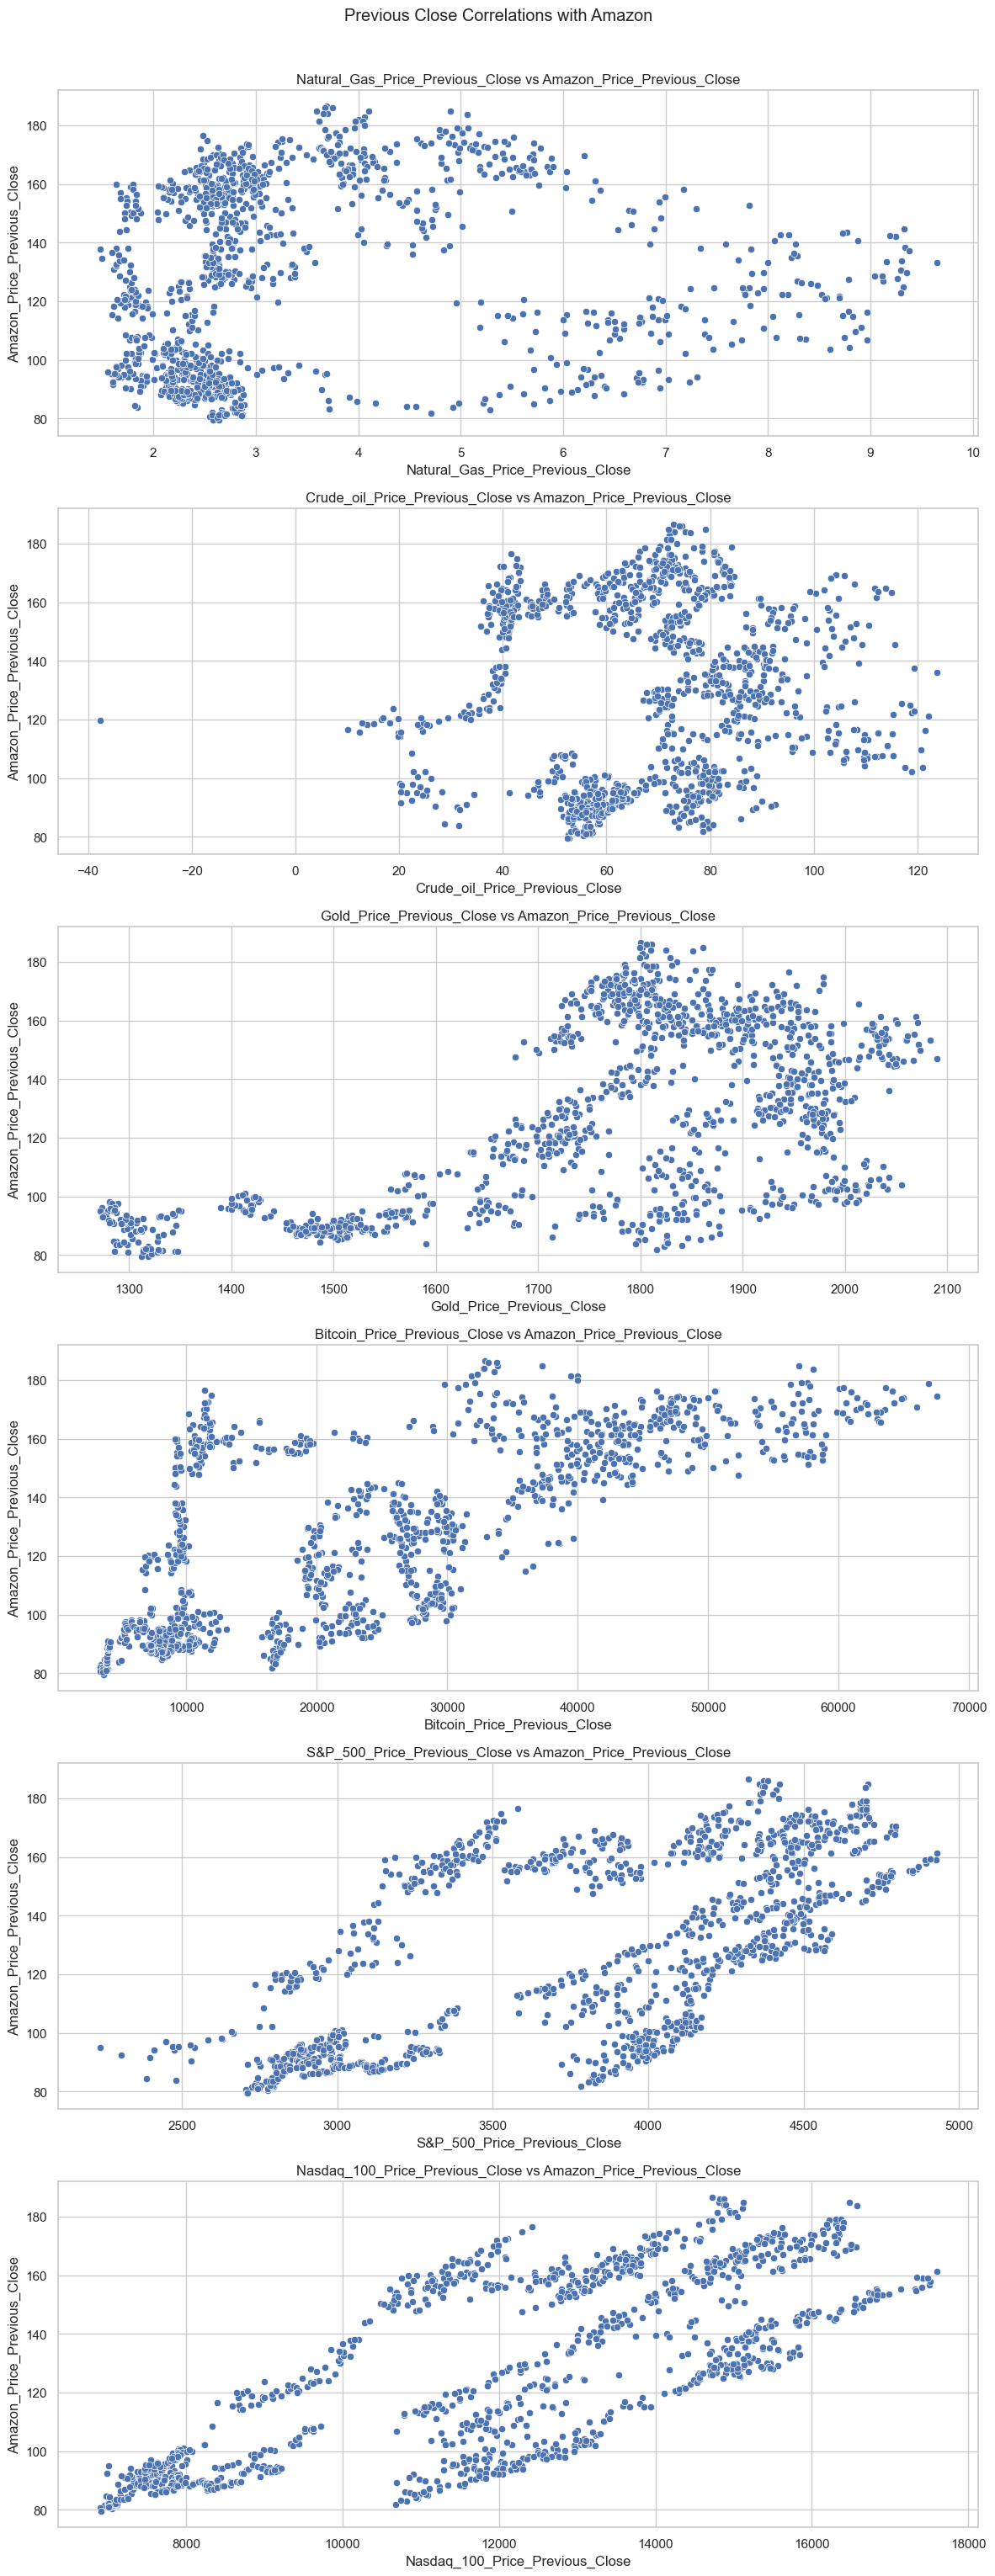

In [21]:
# Define the function to plot correlation pairs
def plot_correlation_pairs(column_pairs, title):
    plt.figure(figsize=(12, len(column_pairs) * 5))
    for i, (col1, col2) in enumerate(column_pairs):
        plt.subplot(len(column_pairs), 1, i + 1)
        sns.scatterplot(x=df_features[col1], y=df_features[col2])
        plt.title(f'{col1} vs {col2}')
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

print("6. Correlation Analysis:")

# Define specific pairs for correlation analysis with Amazon's price-related columns
price_high_pairs = [
    ('Natural_Gas_Price_Previous_High', 'Amazon_Price_Previous_High'),
    ('Crude_oil_Price_Previous_High', 'Amazon_Price_Previous_High'),
    ('Gold_Price_Previous_High', 'Amazon_Price_Previous_High'),
    ('Bitcoin_Price_Previous_High', 'Amazon_Price_Previous_High'),
    ('S&P_500_Price_Previous_High', 'Amazon_Price_Previous_High'),
    ('Nasdaq_100_Price_Previous_High', 'Amazon_Price_Previous_High')
]

price_low_pairs = [
    ('Natural_Gas_Price_Previous_Low', 'Amazon_Price_Previous_Low'),
    ('Crude_oil_Price_Previous_Low', 'Amazon_Price_Previous_Low'),
    ('Gold_Price_Previous_Low', 'Amazon_Price_Previous_Low'),
    ('Bitcoin_Price_Previous_Low', 'Amazon_Price_Previous_Low'),
    ('S&P_500_Price_Previous_Low', 'Amazon_Price_Previous_Low'),
    ('Nasdaq_100_Price_Previous_Low', 'Amazon_Price_Previous_Low')
]

price_close_pairs = [
    ('Natural_Gas_Price_Previous_Close', 'Amazon_Price_Previous_Close'),
    ('Crude_oil_Price_Previous_Close', 'Amazon_Price_Previous_Close'),
    ('Gold_Price_Previous_Close', 'Amazon_Price_Previous_Close'),
    ('Bitcoin_Price_Previous_Close', 'Amazon_Price_Previous_Close'),
    ('S&P_500_Price_Previous_Close', 'Amazon_Price_Previous_Close'),
    ('Nasdaq_100_Price_Previous_Close', 'Amazon_Price_Previous_Close')
]

# Plot correlation pairs
plot_correlation_pairs(price_high_pairs, "Previous High Correlations with Amazon")
plot_correlation_pairs(price_low_pairs, "Previous Low Correlations with Amazon")
plot_correlation_pairs(price_close_pairs, "Previous Close Correlations with Amazon")

# TIME BASED FEATURES

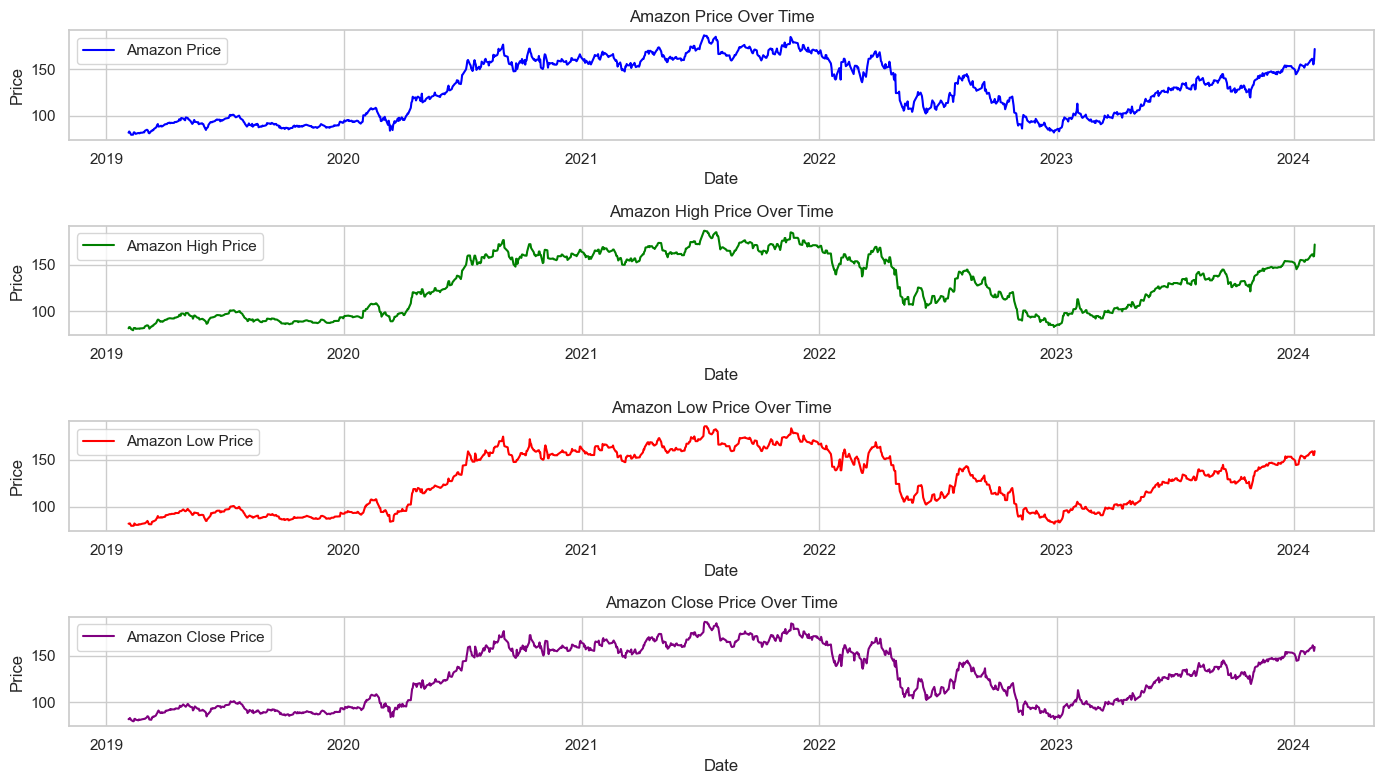

In [22]:
# Time Series Line Plot
plt.figure(figsize=(14, 8))

# Plot Amazon Price
plt.subplot(4, 1, 1)
plt.plot(df_features['Date'], df_features['Amazon_Price'], label='Amazon Price', color='blue')
plt.title('Amazon Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Amazon High Price
plt.subplot(4, 1, 2)
plt.plot(df_features['Date'], df_features['Amazon_Price_Previous_High'], label='Amazon High Price', color='green')
plt.title('Amazon High Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Amazon Low Price
plt.subplot(4, 1, 3)
plt.plot(df_features['Date'], df_features['Amazon_Price_Previous_Low'], label='Amazon Low Price', color='red')
plt.title('Amazon Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Amazon Close Price
plt.subplot(4, 1, 4)
plt.plot(df_features['Date'], df_features['Amazon_Price_Previous_Close'], label='Amazon Close Price', color='purple')
plt.title('Amazon Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Copy the original DataFrame
df_features_scaled = df_features.copy()

# List of features to exclude from standardization
features_to_exclude = ['Amazon_Price', 'Amazon_Price_Previous_High', 'Amazon_Price_Previous_Low', 'Amazon_Price_Previous_Close', 'Date', 'MonthName', 'Year', 'Quarter', 'Week', 'MonthStartDate', 'WeekStartDate']

# Identify the features to be standardized
features_to_standardize = df_features_scaled.columns.difference(features_to_exclude)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_features_scaled[features_to_standardize] = scaler.fit_transform(df_features_scaled[features_to_standardize])

# Display the first few rows of the scaled DataFrame
print(df_features_scaled.head())

   Crude_oil_Price_Lag_1  Natural_Gas_Price_Lag_1  S&P_500_Price_Lag_1  \
0              -0.635518                -0.458509            -1.687941   
1              -0.635518                -0.458509            -1.687941   
2              -0.679506                -0.457411            -1.667638   
3              -0.662400                -0.457411            -1.677275   
4              -0.729359                -0.518349            -1.717723   

   Nasdaq_100_Price_Lag_1  Bitcoin_Price_Lag_1  Copper_Price_Lag_1  \
0               -1.756871            -1.356962           -1.057371   
1               -1.756871            -1.356962           -1.057371   
2               -1.734840            -1.356612           -1.026068   
3               -1.743818            -1.360612           -0.997610   
4               -1.775927            -1.361024           -1.008993   

   Gold_Price_Lag_1  Silver_Price_Lag_1  Amazon_Price_Lag_1  \
0         -2.160189           -1.475644           -1.524013   
1       

# MODEL DEVELOPMENT 

In [26]:
# Define the target variable (y)
y = df_features_scaled[['Amazon_Price', 'Amazon_Price_Previous_High', 'Amazon_Price_Previous_Low', 'Amazon_Price_Previous_Close']]

# Define the features (X) - drop target variables and other non-feature columns
X = df_features_scaled.drop(columns=['Amazon_Price', 'Amazon_Price_Previous_High', 'Amazon_Price_Previous_Low', 'Amazon_Price_Previous_Close', 'Date', 'MonthName', 'Year', 'Quarter', 'Week', 'MonthStartDate', 'WeekStartDate'])

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (994, 49)
X_test shape: (249, 49)
y_train shape: (994, 4)
y_test shape: (249, 4)


In [28]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])  # Print the first 5 predictions

Predictions: [[116.71558849 118.46219436 116.79339413 118.54      ]
 [ 93.40960657  96.50164259  94.10796398  97.2       ]
 [166.93564816 166.66420499 164.48144317 164.21      ]
 [167.20037836 167.40455392 166.17582444 166.38      ]
 [115.34734733 117.00810618 109.29924115 110.96      ]]


In [29]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.5917716634152055
Mean Squared Error (MSE): 1.2448433586693828
Root Mean Squared Error (RMSE): 1.115725485354432


# MODEL VALIDATION & TESTING

In [30]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Since cross_val_score returns negative MSE, we need to take the negative to get positive MSE
cv_scores = -cv_scores

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Calculate RMSE from the mean cross-validation score (MSE)
mean_cv_rmse = np.sqrt(mean_cv_score)

# Display the results
print(f"Cross-Validation Mean MSE: {mean_cv_score}")
print(f"Cross-Validation Standard Deviation: {std_cv_score}")
print(f"Cross-Validation Mean RMSE: {mean_cv_rmse}")

Cross-Validation Mean MSE: 1.4176685042315034
Cross-Validation Standard Deviation: 0.36946002009253065
Cross-Validation Mean RMSE: 1.1906588530017754


In [33]:
# Assuming X_test and y_test are already defined from the previous steps
# Let's select the most recent data (e.g., the last 20% of X_test)
recent_data_size = int(0.2 * len(X_test))
X_recent = X_test[-recent_data_size:]
y_recent = y_test[-recent_data_size:]

# Predict on the recent data
y_recent_pred = model.predict(X_recent)
print("Predictions:", y_recent_pred[:5]) 

# Evaluate the model using MAE and RMSE
recent_mae = mean_absolute_error(y_recent, y_recent_pred)
recent_rmse = np.sqrt(mean_squared_error(y_recent, y_recent_pred))

# Display the results
print(f"Mean Absolute Error (MAE) on Recent Data: {recent_mae}")
print(f"Root Mean Squared Error (RMSE) on Recent Data: {recent_rmse}")

Predictions: [[ 90.79811265  90.88603831  90.78207434  90.87      ]
 [ 87.69657948  90.51533178  87.4612477   90.28      ]
 [160.69822025 161.54219098 159.51602926 160.36      ]
 [119.32592461 119.01309321 116.7228314  116.41      ]
 [176.2800084  176.33839191 174.11161649 174.17      ]]
Mean Absolute Error (MAE) on Recent Data: 0.6103821162865797
Root Mean Squared Error (RMSE) on Recent Data: 1.018594301084681



Feature importance for target: Amazon_Price
Feature: Crude_oil_Price_Lag_1, Coefficient: -0.1124
Feature: Natural_Gas_Price_Lag_1, Coefficient: 0.1014
Feature: S&P_500_Price_Lag_1, Coefficient: 8.6079
Feature: Nasdaq_100_Price_Lag_1, Coefficient: -28.8779
Feature: Bitcoin_Price_Lag_1, Coefficient: 0.6810
Feature: Copper_Price_Lag_1, Coefficient: 0.1665
Feature: Gold_Price_Lag_1, Coefficient: -0.2451
Feature: Silver_Price_Lag_1, Coefficient: -0.2609
Feature: Amazon_Price_Lag_1, Coefficient: 30.0555
Feature: Crude_oil_Price_Previous_Close, Coefficient: -0.1124
Feature: Crude_oil_Price_Previous_High, Coefficient: 0.3639
Feature: Crude_oil_Price_Previous_Low, Coefficient: -0.4306
Feature: Natural_Gas_Price_Previous_Close, Coefficient: 0.1014
Feature: Natural_Gas_Price_Previous_High, Coefficient: -1.1707
Feature: Natural_Gas_Price_Previous_Low, Coefficient: 1.2381
Feature: S&P_500_Price_Previous_Close, Coefficient: 8.6079
Feature: S&P_500_Price_Previous_High, Coefficient: -6.3845
Feature: 

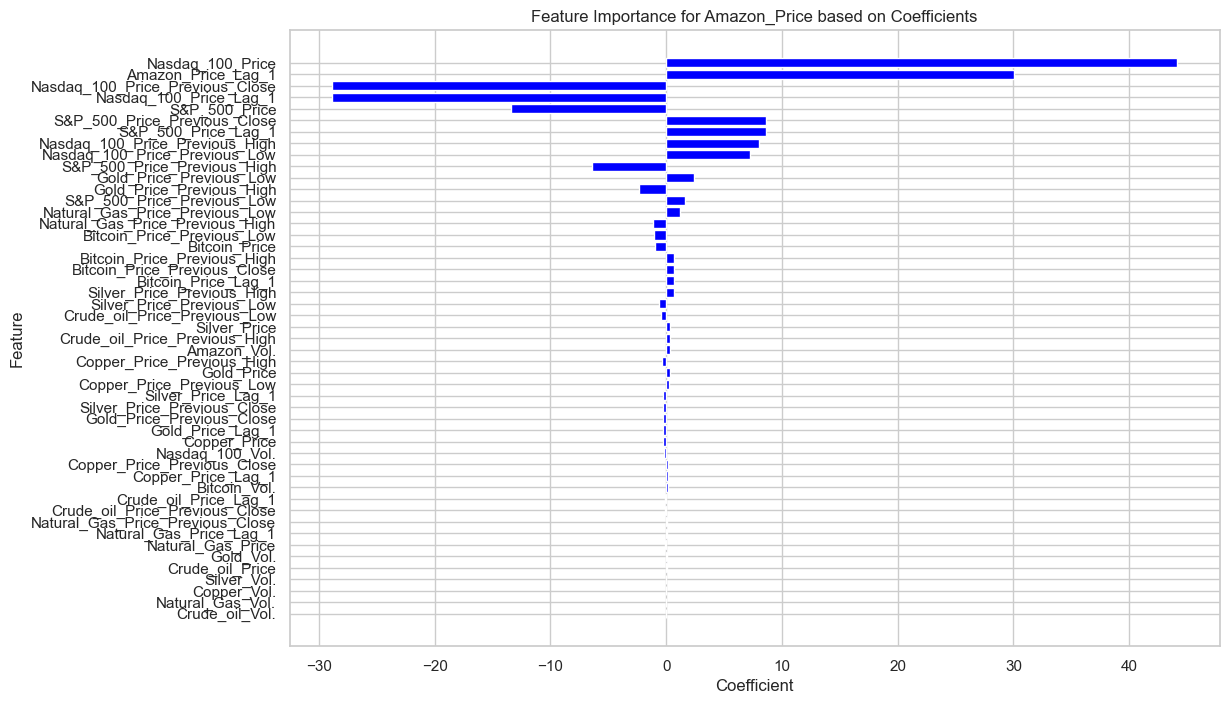


Feature importance for target: Amazon_Price_Previous_High
Feature: Crude_oil_Price_Lag_1, Coefficient: -0.0206
Feature: Natural_Gas_Price_Lag_1, Coefficient: 0.3144
Feature: S&P_500_Price_Lag_1, Coefficient: 4.6754
Feature: Nasdaq_100_Price_Lag_1, Coefficient: -14.4813
Feature: Bitcoin_Price_Lag_1, Coefficient: 0.3863
Feature: Copper_Price_Lag_1, Coefficient: 0.0248
Feature: Gold_Price_Lag_1, Coefficient: -0.0561
Feature: Silver_Price_Lag_1, Coefficient: -0.3041
Feature: Amazon_Price_Lag_1, Coefficient: 30.5057
Feature: Crude_oil_Price_Previous_Close, Coefficient: -0.0206
Feature: Crude_oil_Price_Previous_High, Coefficient: -0.0254
Feature: Crude_oil_Price_Previous_Low, Coefficient: 0.0615
Feature: Natural_Gas_Price_Previous_Close, Coefficient: 0.3144
Feature: Natural_Gas_Price_Previous_High, Coefficient: -1.4090
Feature: Natural_Gas_Price_Previous_Low, Coefficient: 1.3382
Feature: S&P_500_Price_Previous_Close, Coefficient: 4.6754
Feature: S&P_500_Price_Previous_High, Coefficient: -8.

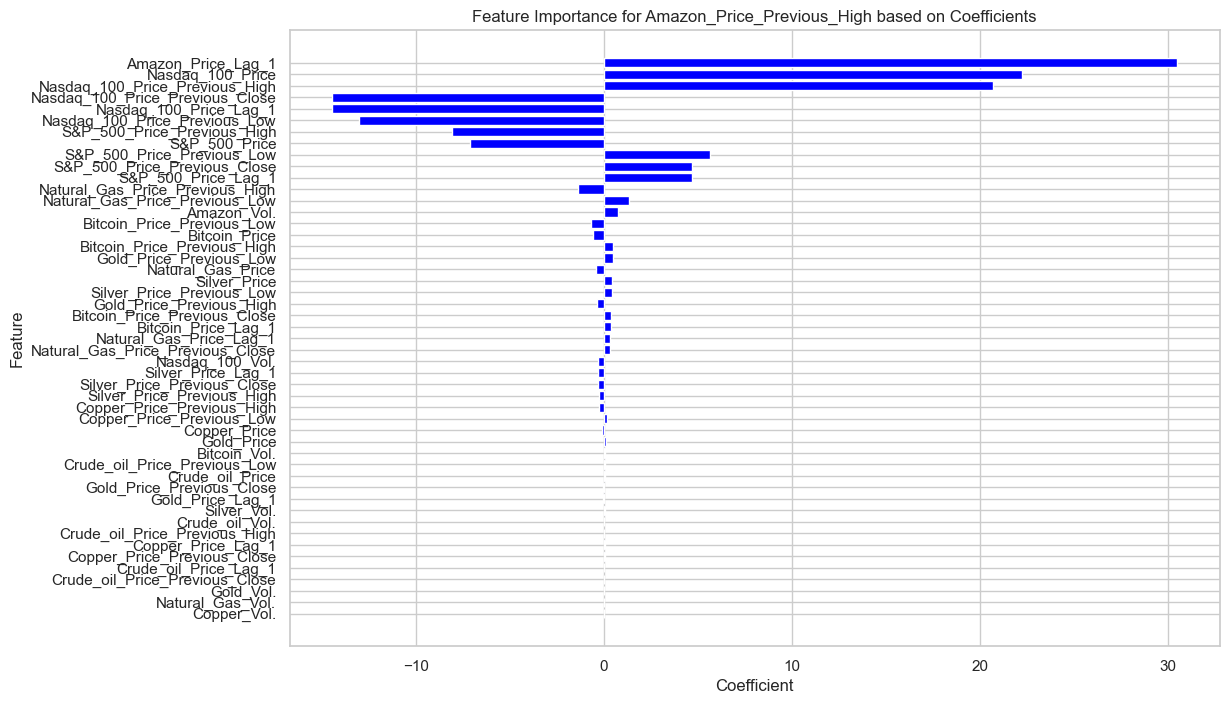


Feature importance for target: Amazon_Price_Previous_Low
Feature: Crude_oil_Price_Lag_1, Coefficient: -0.0918
Feature: Natural_Gas_Price_Lag_1, Coefficient: -0.2130
Feature: S&P_500_Price_Lag_1, Coefficient: 3.9325
Feature: Nasdaq_100_Price_Lag_1, Coefficient: -14.3966
Feature: Bitcoin_Price_Lag_1, Coefficient: 0.2948
Feature: Copper_Price_Lag_1, Coefficient: 0.1417
Feature: Gold_Price_Lag_1, Coefficient: -0.1891
Feature: Silver_Price_Lag_1, Coefficient: 0.0433
Feature: Amazon_Price_Lag_1, Coefficient: 30.3506
Feature: Crude_oil_Price_Previous_Close, Coefficient: -0.0918
Feature: Crude_oil_Price_Previous_High, Coefficient: 0.3894
Feature: Crude_oil_Price_Previous_Low, Coefficient: -0.4920
Feature: Natural_Gas_Price_Previous_Close, Coefficient: -0.2130
Feature: Natural_Gas_Price_Previous_High, Coefficient: 0.2383
Feature: Natural_Gas_Price_Previous_Low, Coefficient: -0.1001
Feature: S&P_500_Price_Previous_Close, Coefficient: 3.9325
Feature: S&P_500_Price_Previous_High, Coefficient: 1.7

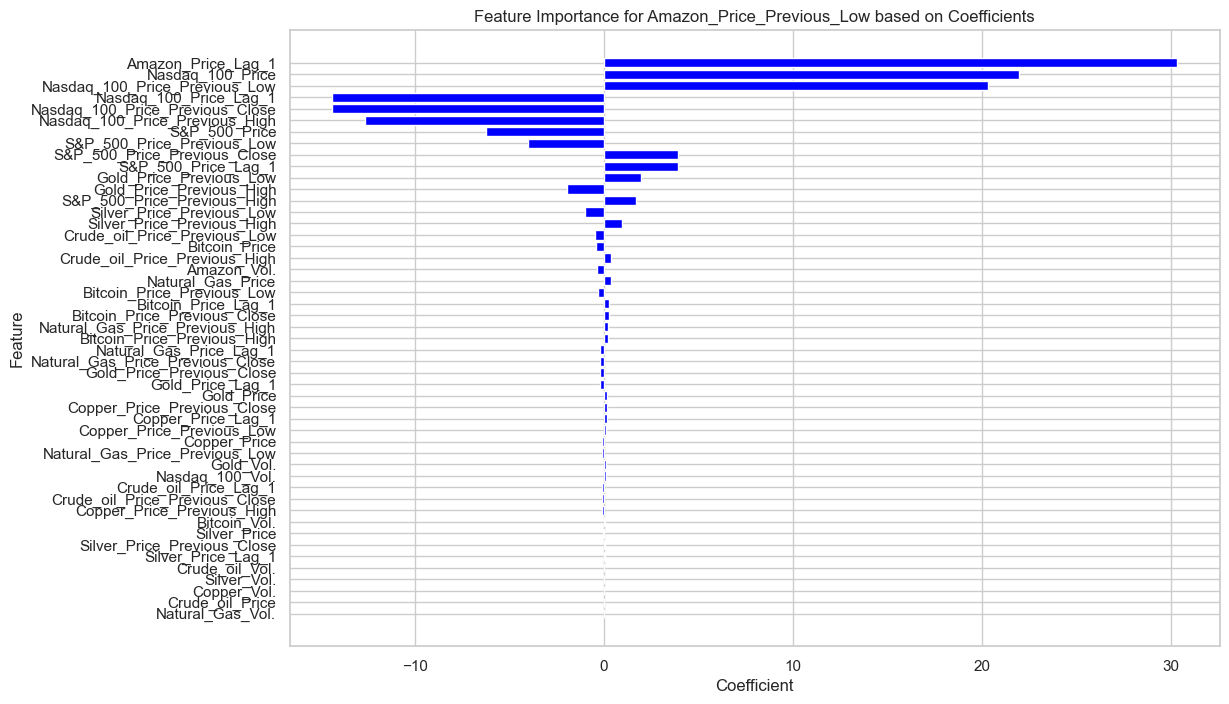


Feature importance for target: Amazon_Price_Previous_Close
Feature: Crude_oil_Price_Lag_1, Coefficient: 0.0000
Feature: Natural_Gas_Price_Lag_1, Coefficient: -0.0000
Feature: S&P_500_Price_Lag_1, Coefficient: 0.0000
Feature: Nasdaq_100_Price_Lag_1, Coefficient: -0.0000
Feature: Bitcoin_Price_Lag_1, Coefficient: 0.0000
Feature: Copper_Price_Lag_1, Coefficient: 0.0000
Feature: Gold_Price_Lag_1, Coefficient: -0.0000
Feature: Silver_Price_Lag_1, Coefficient: -0.0000
Feature: Amazon_Price_Lag_1, Coefficient: 30.8007
Feature: Crude_oil_Price_Previous_Close, Coefficient: 0.0000
Feature: Crude_oil_Price_Previous_High, Coefficient: 0.0000
Feature: Crude_oil_Price_Previous_Low, Coefficient: -0.0000
Feature: Natural_Gas_Price_Previous_Close, Coefficient: 0.0000
Feature: Natural_Gas_Price_Previous_High, Coefficient: 0.0000
Feature: Natural_Gas_Price_Previous_Low, Coefficient: 0.0000
Feature: S&P_500_Price_Previous_Close, Coefficient: 0.0000
Feature: S&P_500_Price_Previous_High, Coefficient: 0.000

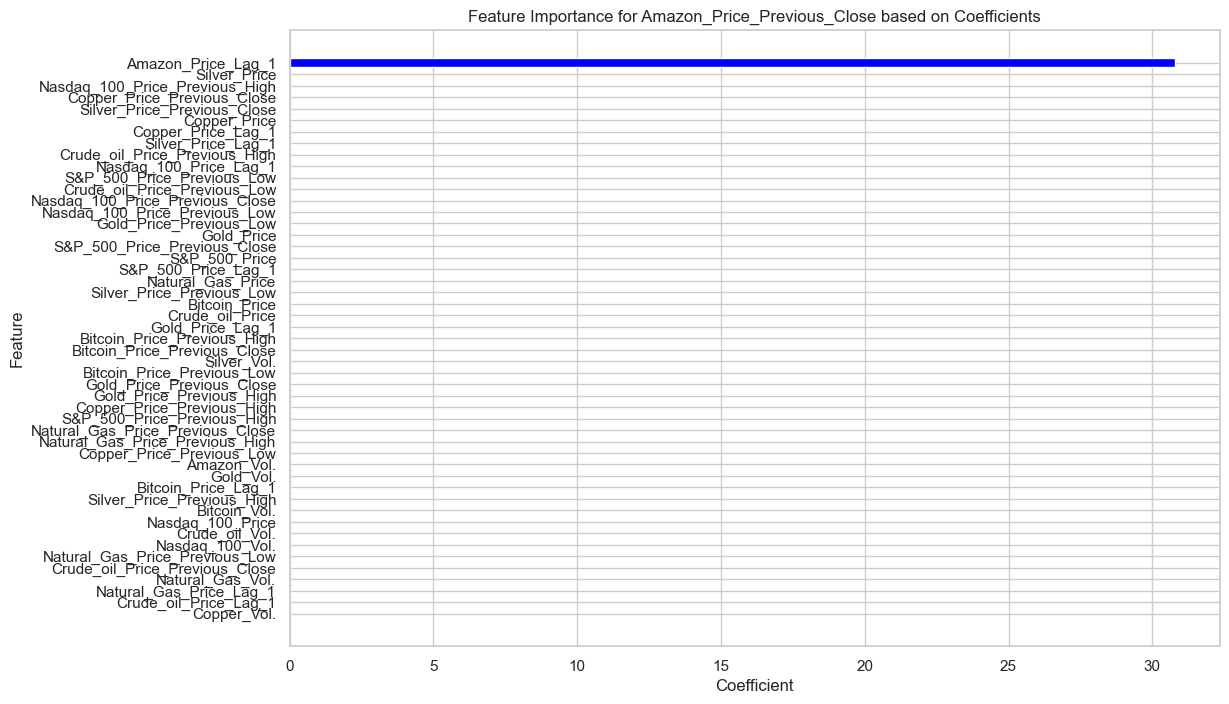

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is trained and features are standardized
# Check if the model is multi-output (has multiple coefficients)
if len(model.coef_.shape) > 1:
    for i, target_name in enumerate(y.columns):  # Assuming y has column names
        print(f"\nFeature importance for target: {target_name}")
        
        # Extract coefficients for the specific target
        coefficients = model.coef_[i]

        # Print the coefficients for each feature
        for feature, coeff in zip(X.columns, coefficients):
            print(f"Feature: {feature}, Coefficient: {coeff:.4f}")

        # Create a DataFrame to pair coefficients with feature names
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        # Sort the features by absolute coefficient value (importance)
        feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        # Visualize the feature importances using a bar plot
        plt.figure(figsize=(12, 8))
        plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='blue')
        plt.xlabel('Coefficient')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {target_name} based on Coefficients')
        plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
        plt.show()

else:
    # For single-output models
    coefficients = model.coef_

    # Print the coefficients for each feature
    print("\nFeature importance for the single output:")
    for feature, coeff in zip(X.columns, coefficients):
        print(f"Feature: {feature}, Coefficient: {coeff:.4f}")

    # Create a DataFrame to pair coefficients with feature names
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefficients
    })

    # Sort the features by absolute coefficient value (importance)
    feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

    # Visualize the feature importances using a bar plot
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='blue')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.title('Feature Importance based on Coefficients')
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
    plt.show()